In [10]:
import numpy as np
import astropy.constants as c
import math
import scipy
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [11]:
'''Uses the Gaussian as the height in the function to plot the Lorentzians'''
def lorentz_gauss(modes, Gauss, width):
    Lorentzh = np.zeros(len(x))
    for p in range(len(modes)):
        Lorentzh+=(Gauss*((1+((x - np.array(modes)[p])/(width/2))**2)**(-1)))
    Lorentzh_array = np.array(Lorentzh)
    return Lorentzh_array

In [12]:
'''Adds random noise'''
def addnoise(pure):
    vary = np.random.uniform(0, 1, pure.shape)
    signal = -(pure* np.log(vary))
    return (signal)

In [13]:
'''groups an array in groups of a given size then averaging them'''
def bin_it(yvalues, binsize):
    N=int(math.ceil(len(yvalues) / binsize))
    #finds number of times code should loop, taking into acount the final group may be smaller than binsize
    C=0
    newy=[] #list for new y array
    while C<N:
        if (C+1)*binsize<len(yvalues): #if the end of the bin is still inside the orignal array
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize #group of binsize averaged
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
            #if end of bin would be oustide the array use end of the array as the end of the bin
        newy.append(Q)
        C+=1
    return np.array(newy)

In [26]:
# DEFINING SOLAR PARAMETERS #
delta_v_sun = 134.8 #microHz
D = 1.5
n = []
for i in range(40):
    n.append(i+1)

l0= 0
l1 = 1
l2 = 2
l3 = 3

width = 10

frequency = []
for j in range(6000):
    frequency.append(j+1)
x = np.array(frequency)

H=5
epsilon=1.5
V_max_sun = 3100 #microHz
A_max_sun = 2.1 #ppm from Warrick's paper

''' CALCULATES MODES FOR DIFFERENT ANGULAR DEGREE, l AND RADIAL MODE, n '''
modes=[]
for i in range(len(n)):
    modes.append(delta_v_sun*(n[i]+((l0)/2)+epsilon)-D*(l0)*((l0)+1))
modes1=[]
for i in range(len(n)):
    modes1.append(delta_v_sun*(n[i]+((l1)/2)+epsilon)-D*(l1)*((l1)+1))
modes2=[]
for i in range(len(n)):
    modes2.append(delta_v_sun*(n[i]+((l2)/2)+epsilon)-D*(l2)*((l2)+1))
modes3=[]
for i in range(len(n)):
    modes3.append(delta_v_sun*(n[i]+((l3)/2)+epsilon)-D*(l3)*((l3)+1))

#Defines Gaussian curve with height A squared
sigma = 2.123*delta_v_sun #microHz
Gauss = (A_max_sun**2)*(np.exp(-0.5*((x-V_max_sun)/sigma)**2))

#Defines parameters for granulation
tau_sun = 200 #seconds
g_sun = 274 #metres per second squared
T_eff_sun = 5777 #Kelvin
sigma_sun = 50000/(c.R_sun.value/(1000*10**3)) #ppm

granulation = (4*np.sqrt(2)*tau_sun/1e6*(sigma_sun)**2)/(1+(2*np.pi*x*tau_sun/1e6)**4)
#ppm squared per micro hertz

#Defines width of the Lorentzians
alpha = -25.5+29.1 #for the Sun
gamma_alpha = 6.3 - 1.8 #for the Sun
linewidth = (alpha*np.log(x/V_max_sun)+np.log(gamma_alpha))

#Heights of modes scaled to their relative visibilities 
L0 = Lorentzh_array_0 = lorentz_gauss(modes, Gauss, linewidth)
L1 = Lorentzh_array_1 = lorentz_gauss(modes1, Gauss*1.5, linewidth)
L2 = Lorentzh_array_2 = lorentz_gauss(modes2, Gauss*0.5, linewidth)
L3 = Lorentzh_array_3 = lorentz_gauss(modes3, Gauss*0.04, linewidth)

shot_noises = []
mags = np.linspace(-13,13,53)
print(mags)

for n in mags:
    vmag = np.full((6000), n) #here 8 defines the apparent magnitude
    shot_noises.append(18*10**(-0.4*(11.0-vmag)))

# PUTTING TOGETHER ALL COMPONENTS
Osc = (L0 + L1 + L2 + L3)
G = granulation

TotalSpec = []
for SNL in shot_noises:
    Spectrum = Osc + G + (SNL)
    TotalSpec.append(Spectrum)
#print(TotalSpec)

[-13.  -12.5 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5  -8.   -7.5
  -7.   -6.5  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5  -2.   -1.5
  -1.   -0.5   0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5
   5.    5.5   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5
  11.   11.5  12.   12.5  13. ]


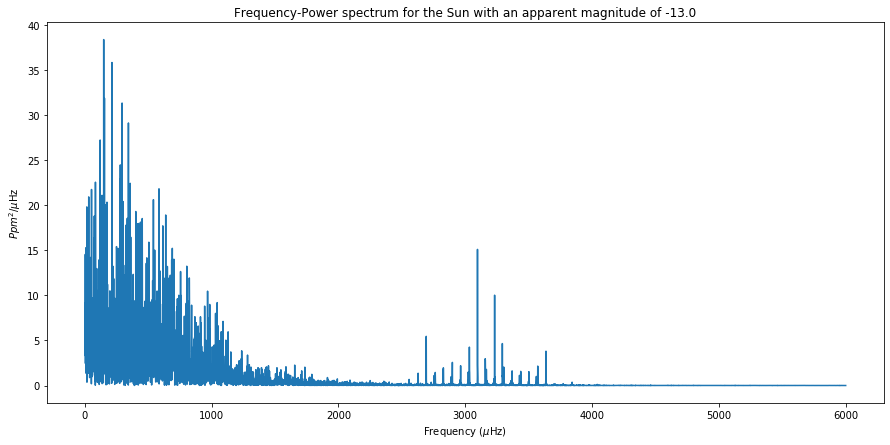

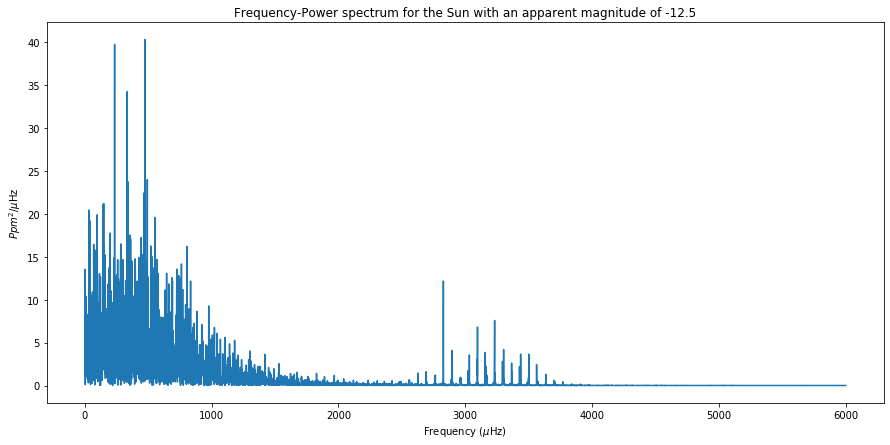

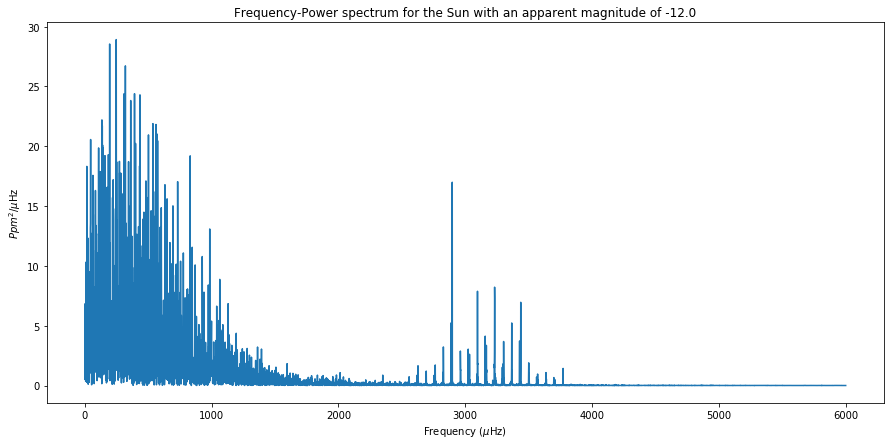

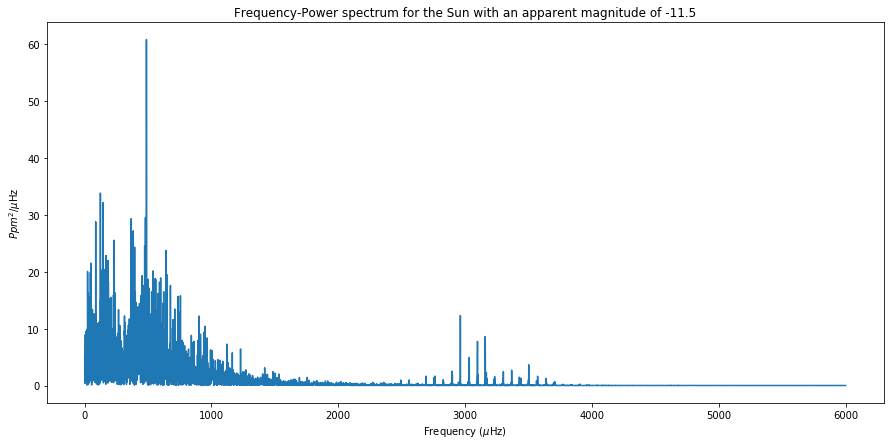

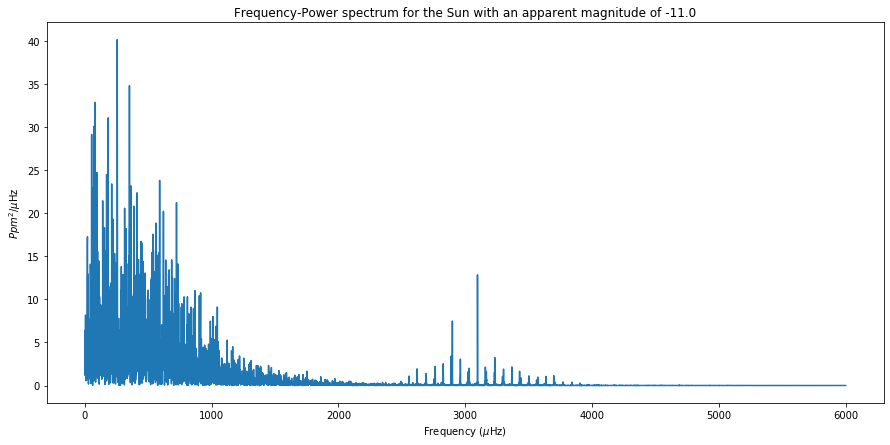

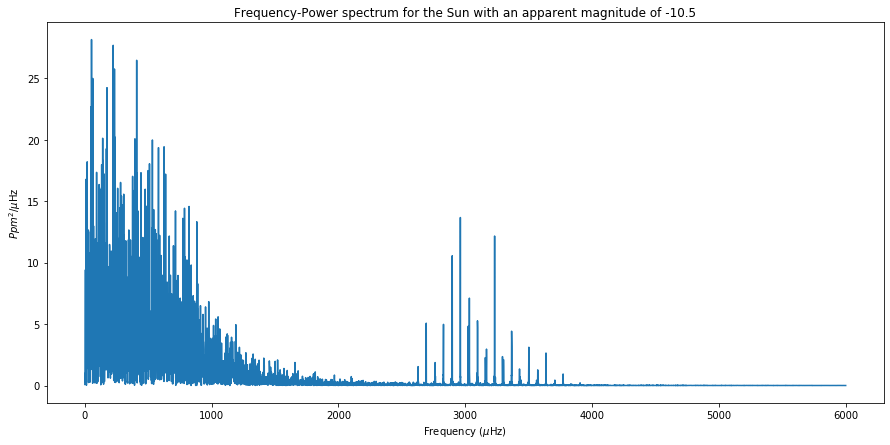

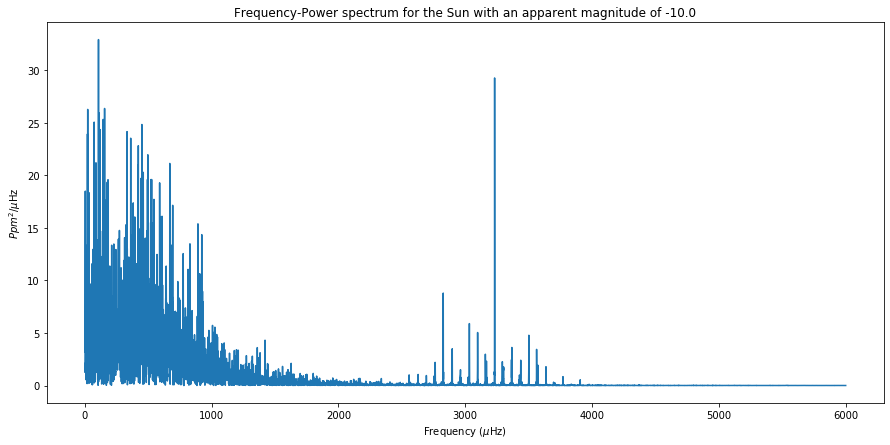

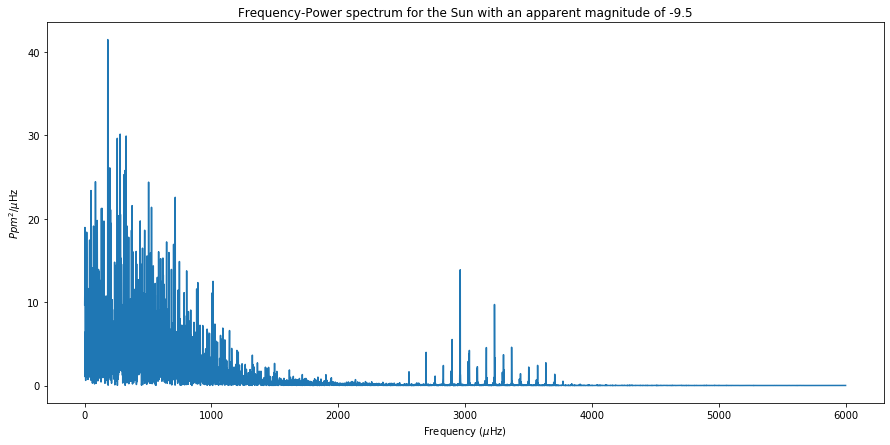

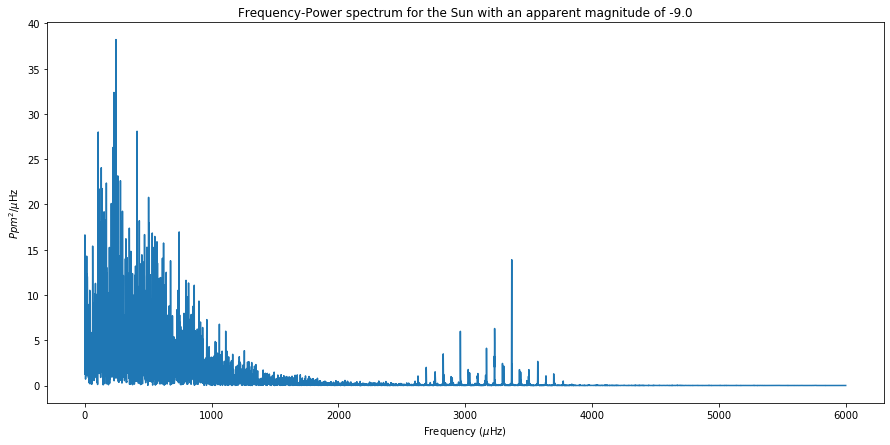

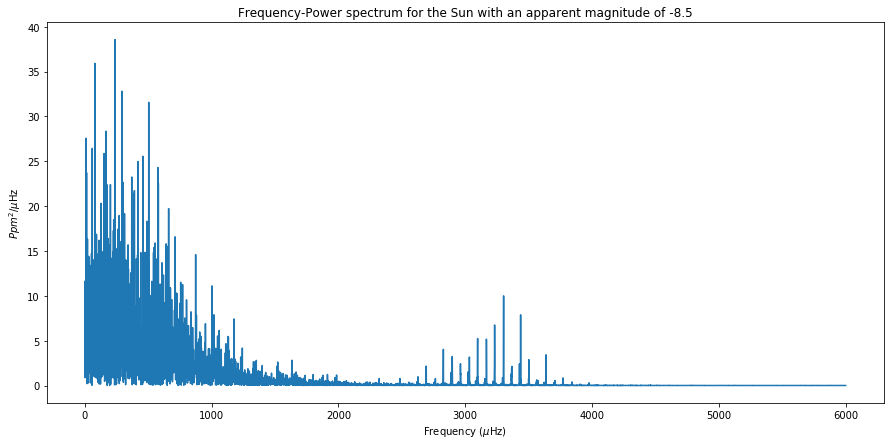

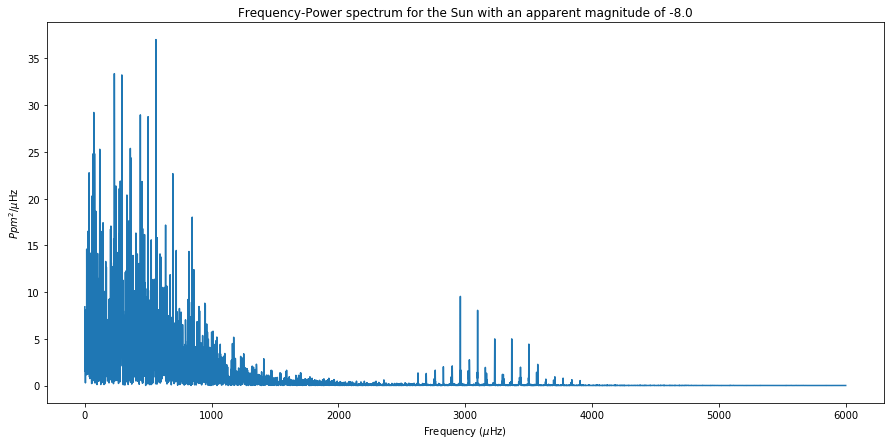

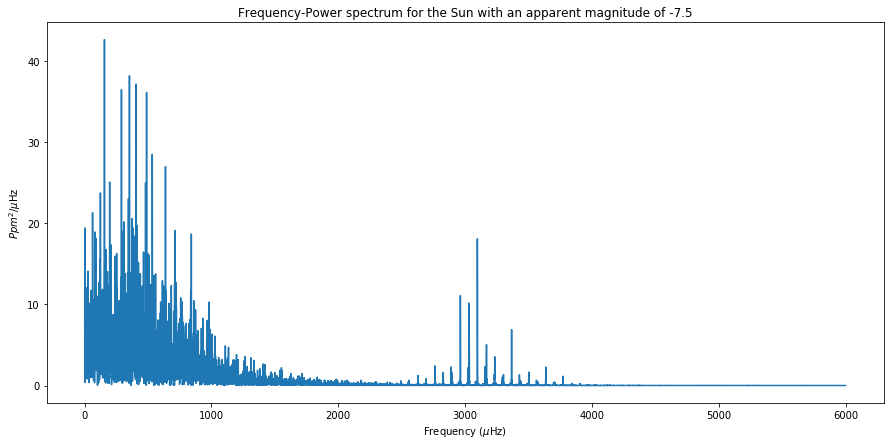

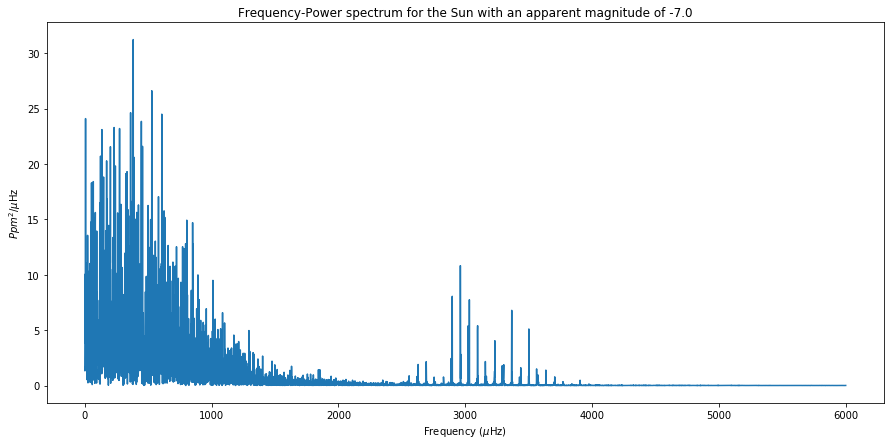

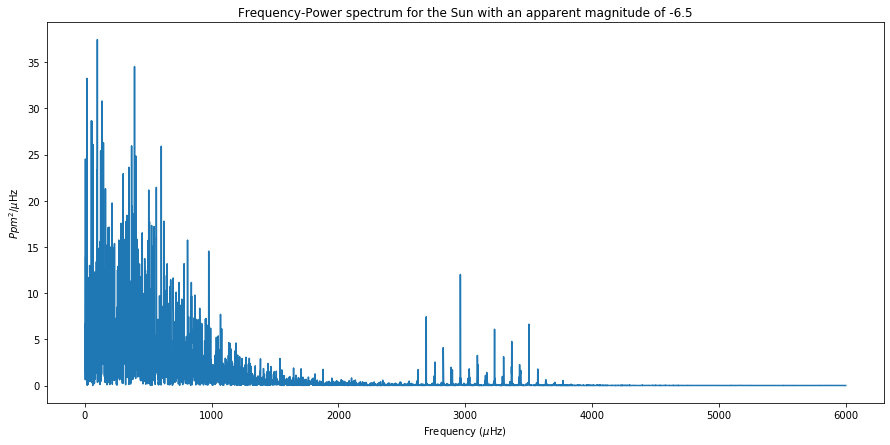

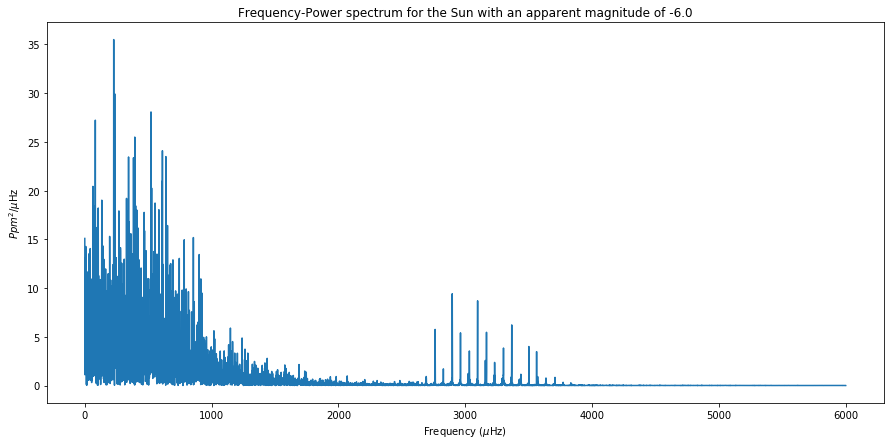

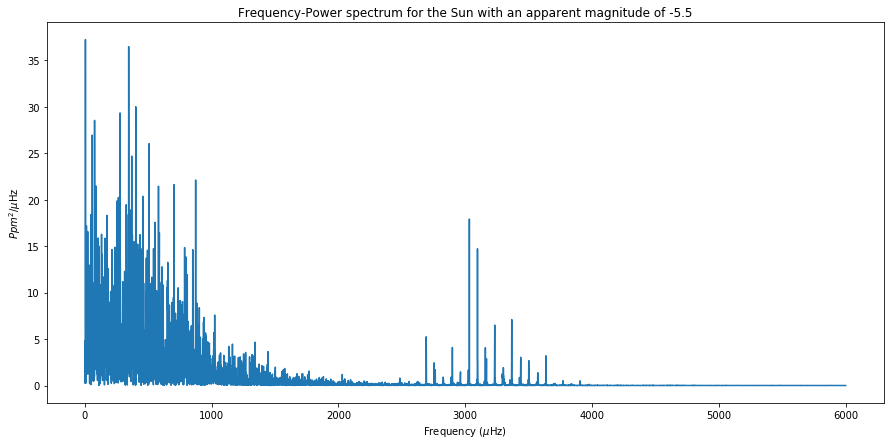

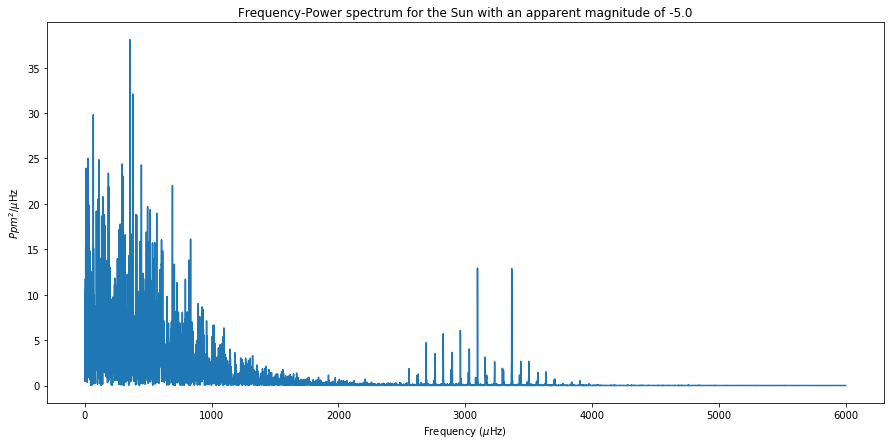

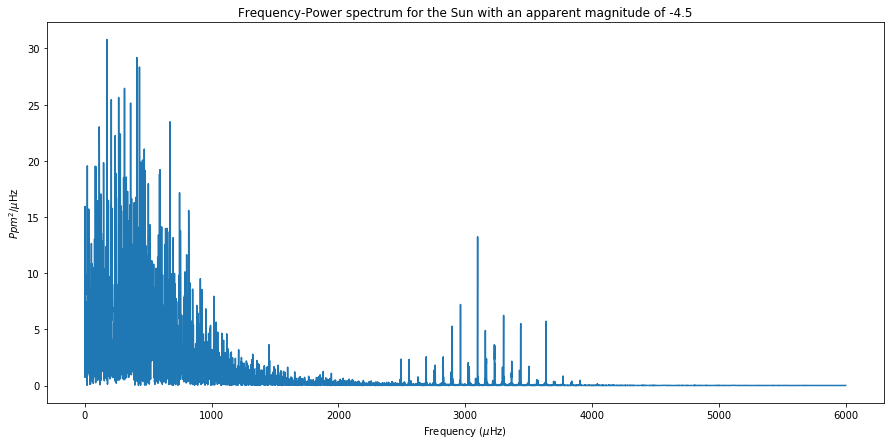

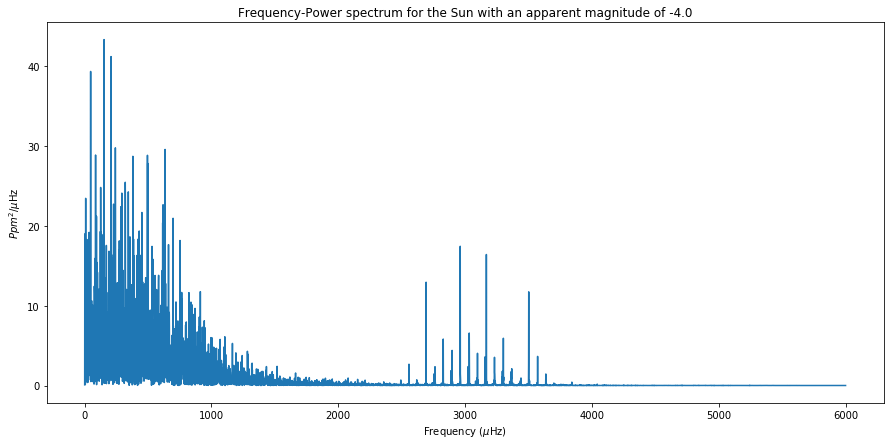

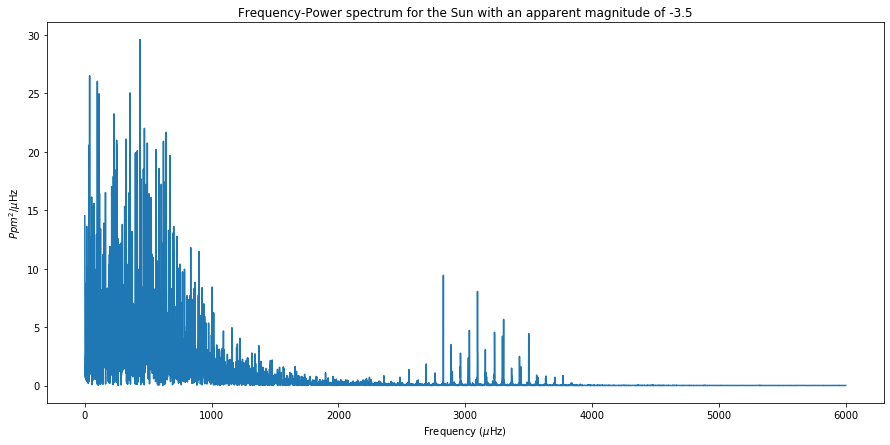

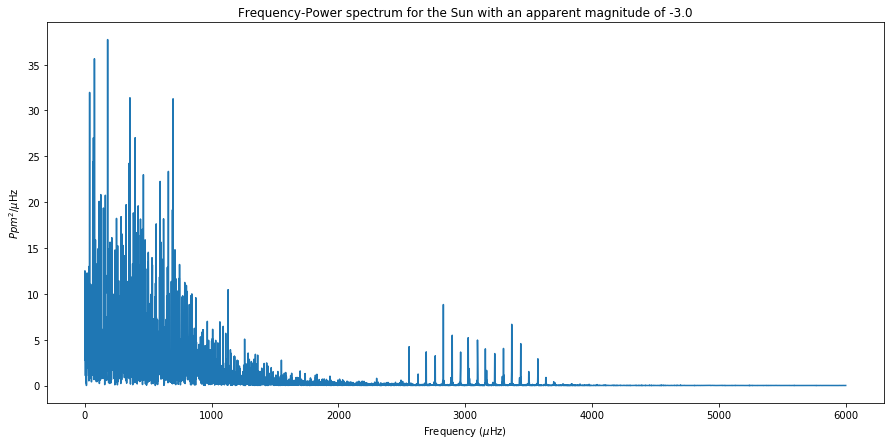

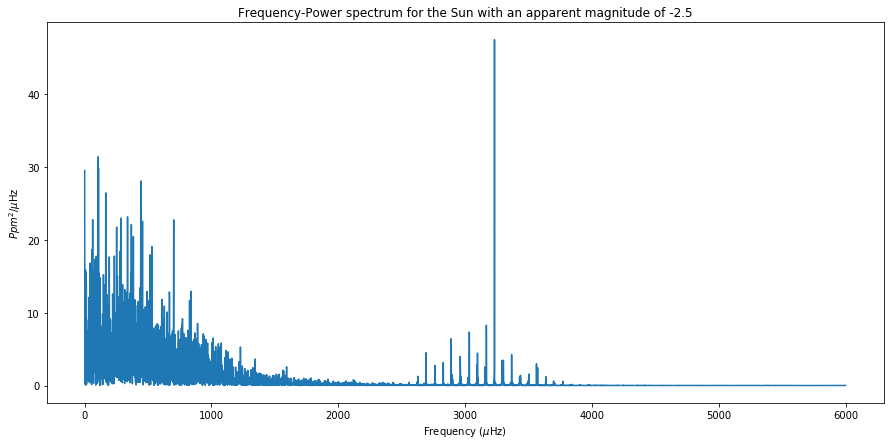

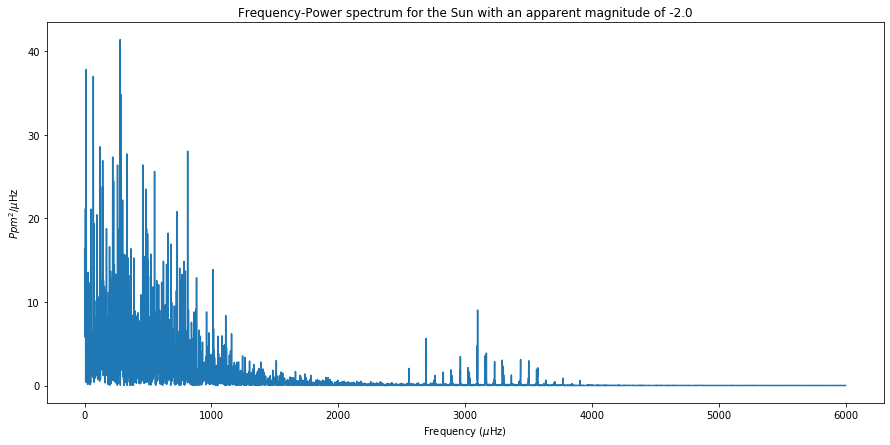

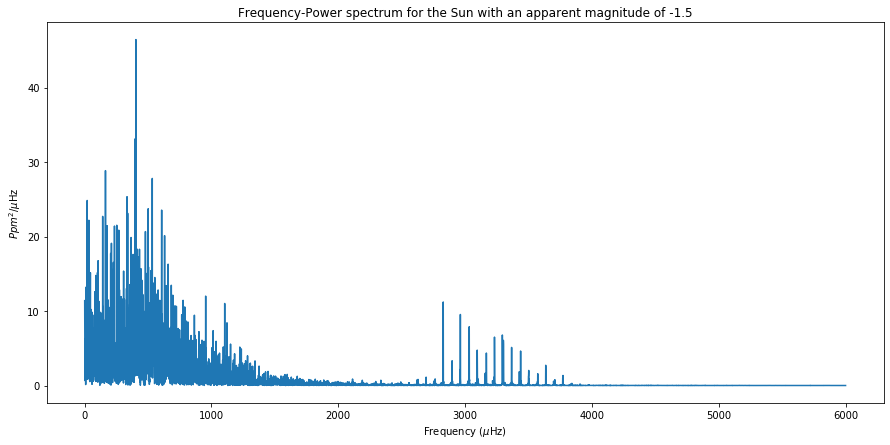

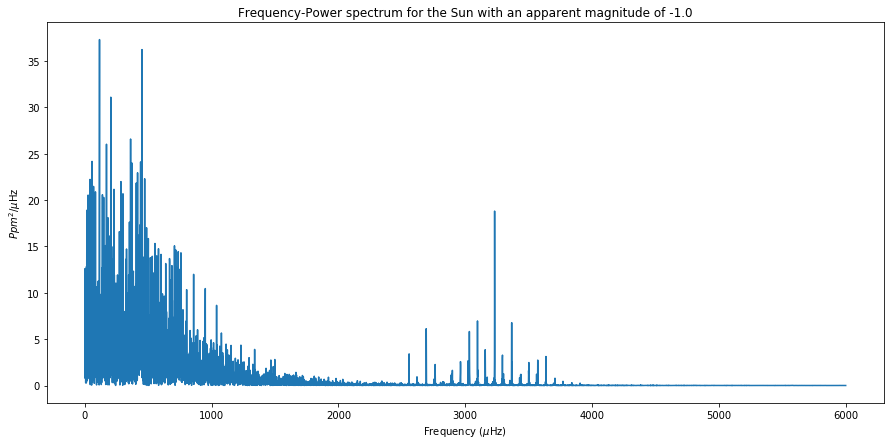

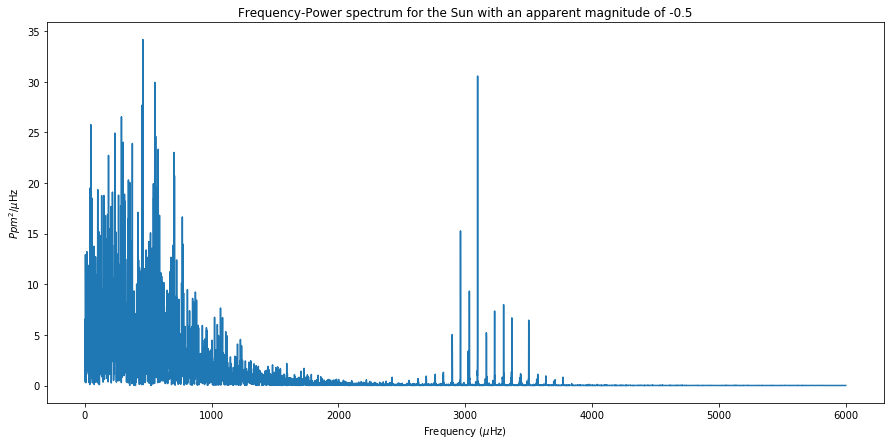

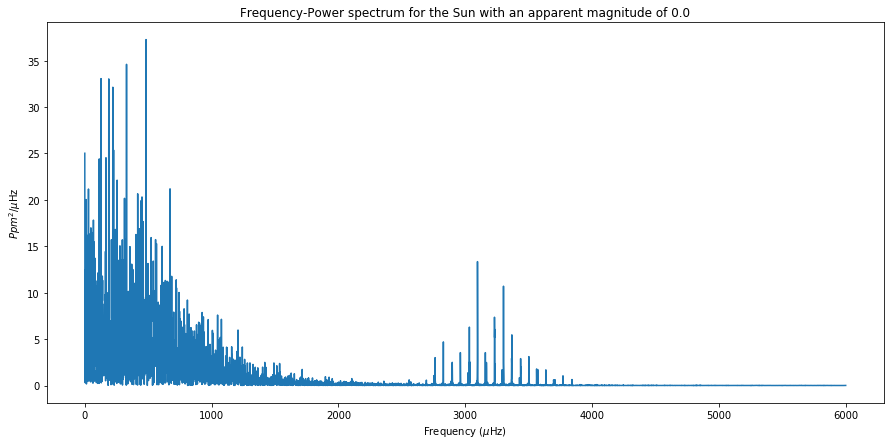

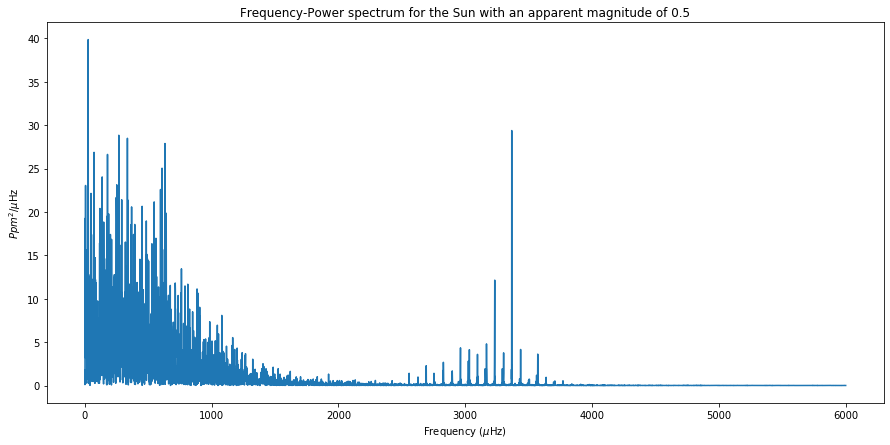

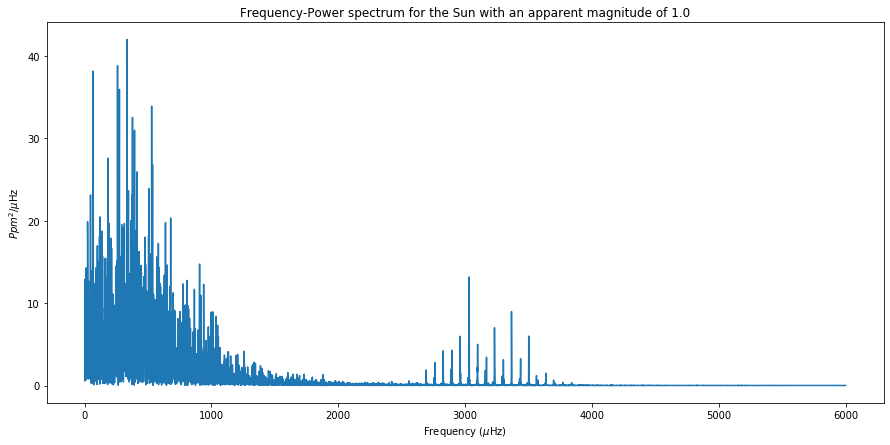

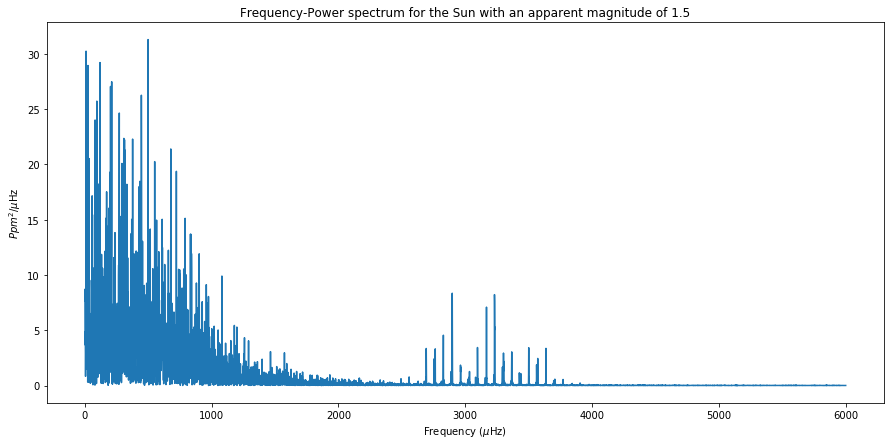

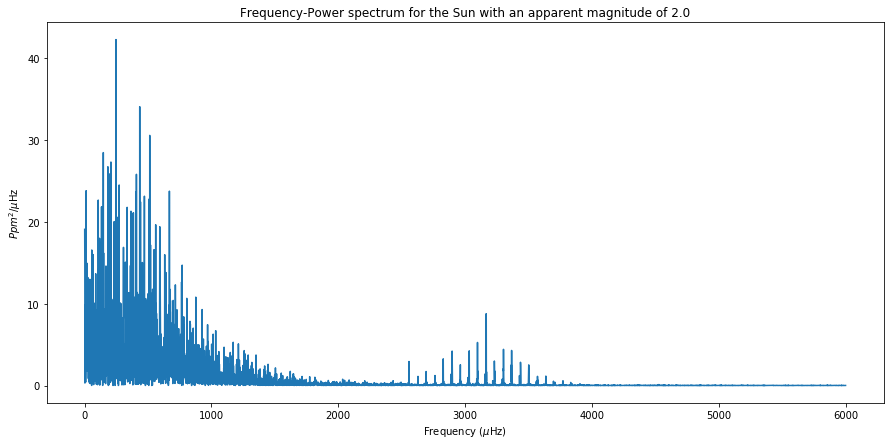

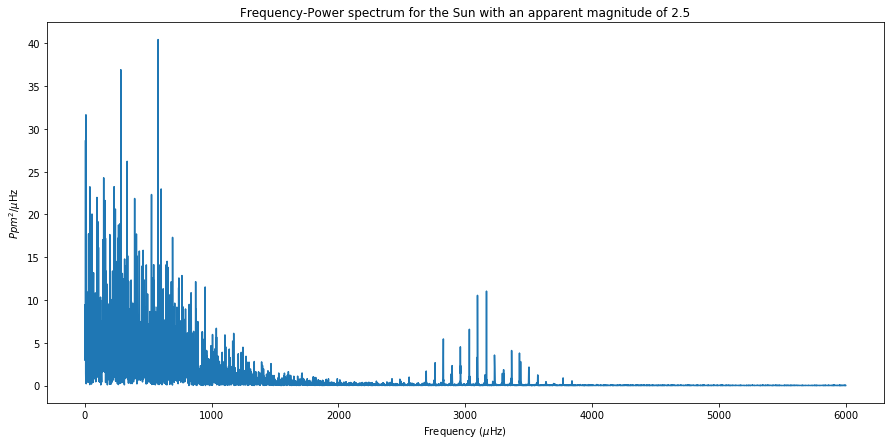

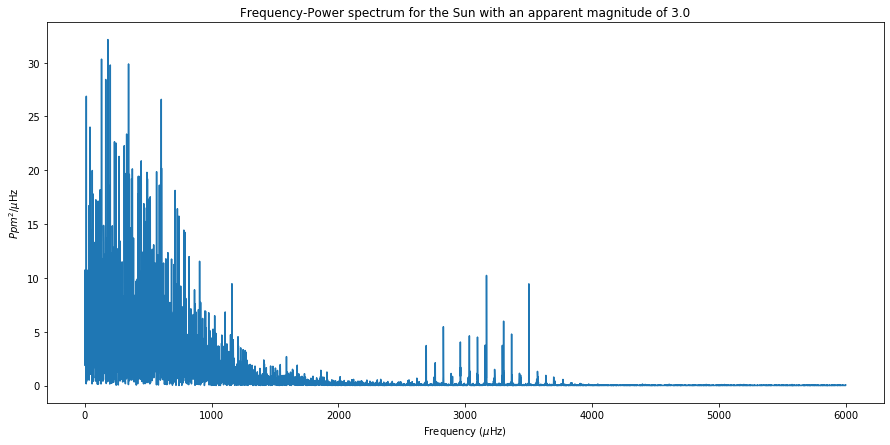

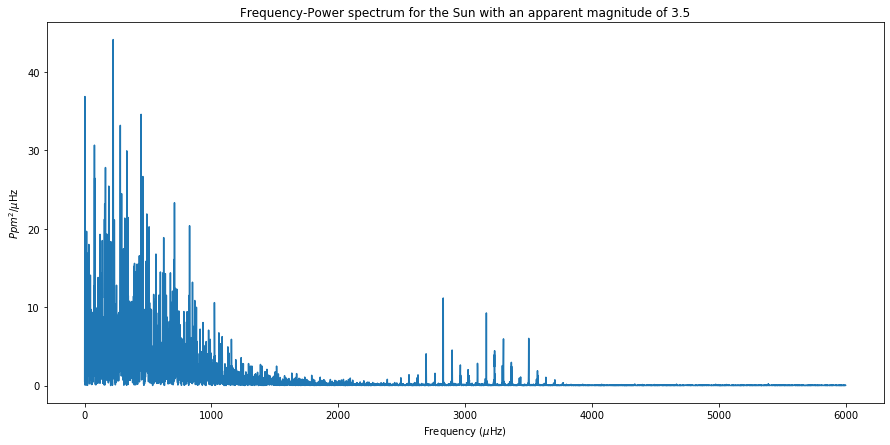

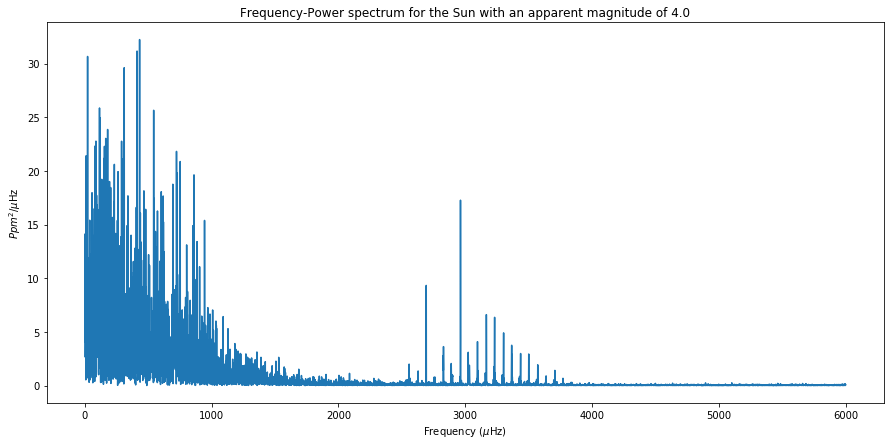

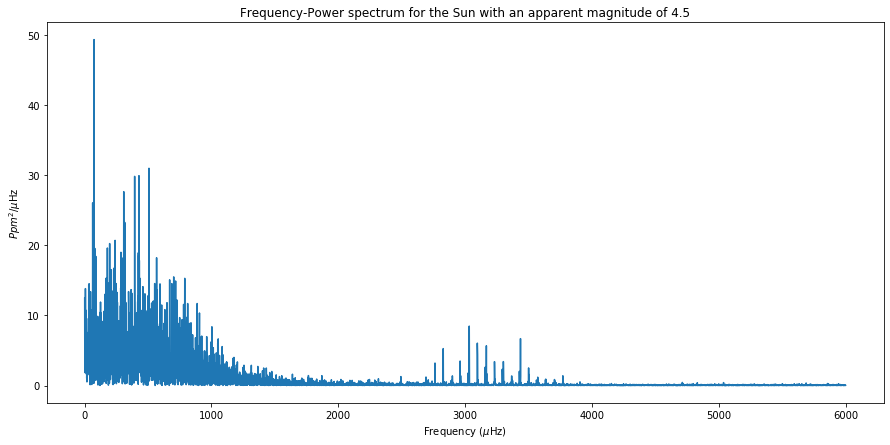

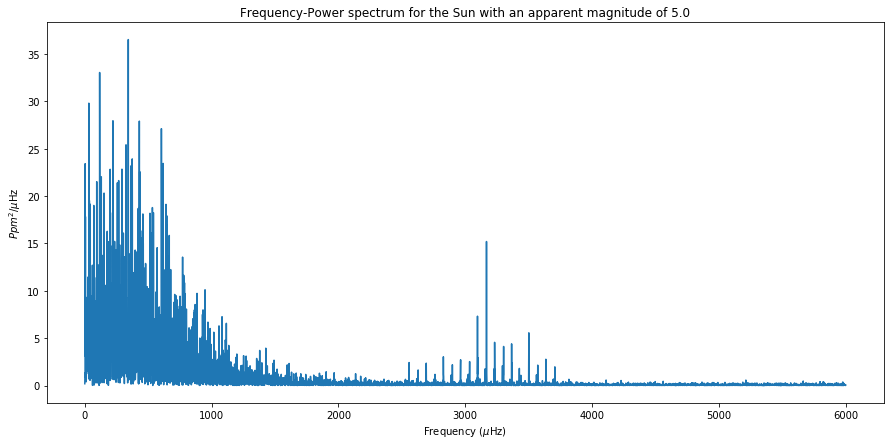

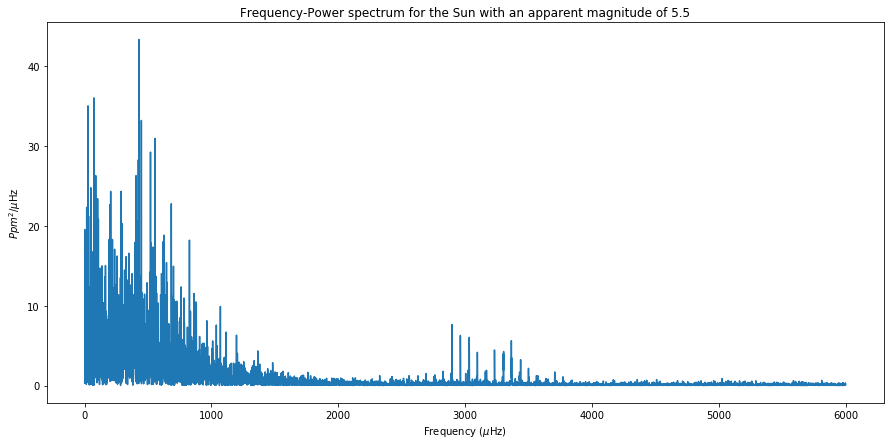

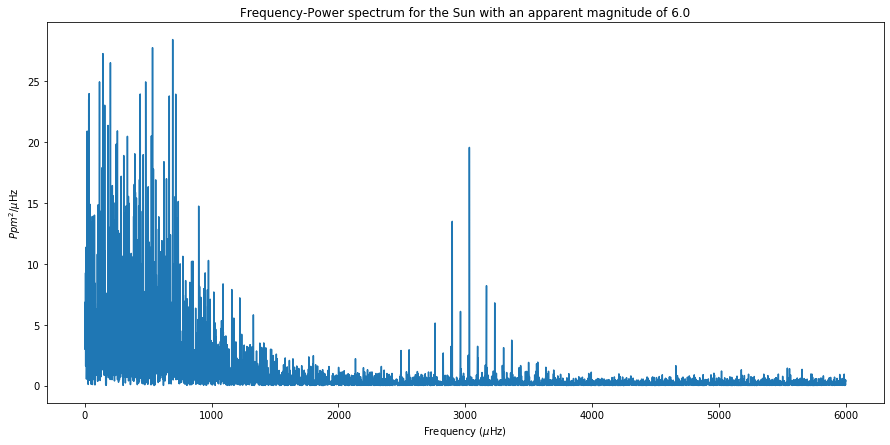

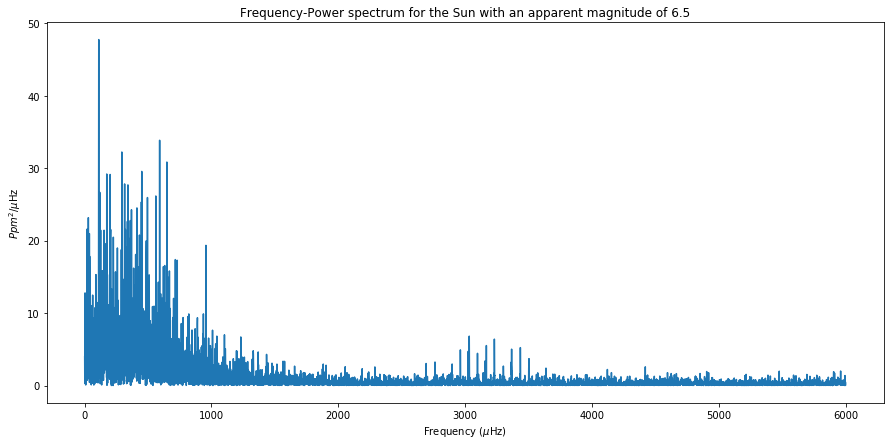

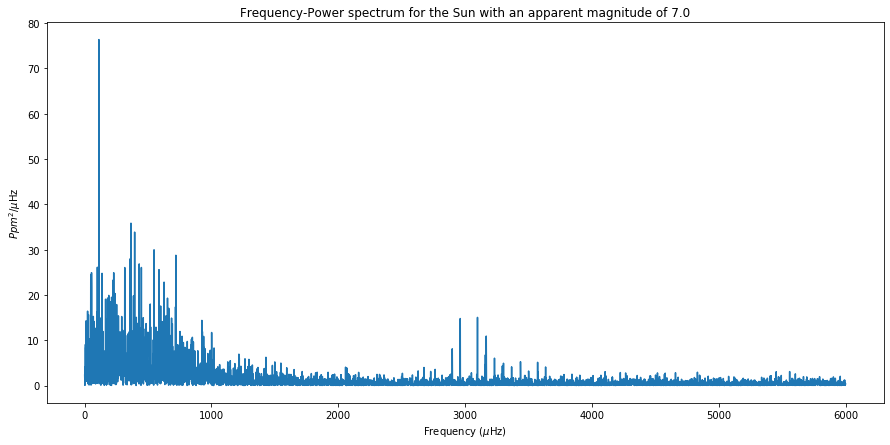

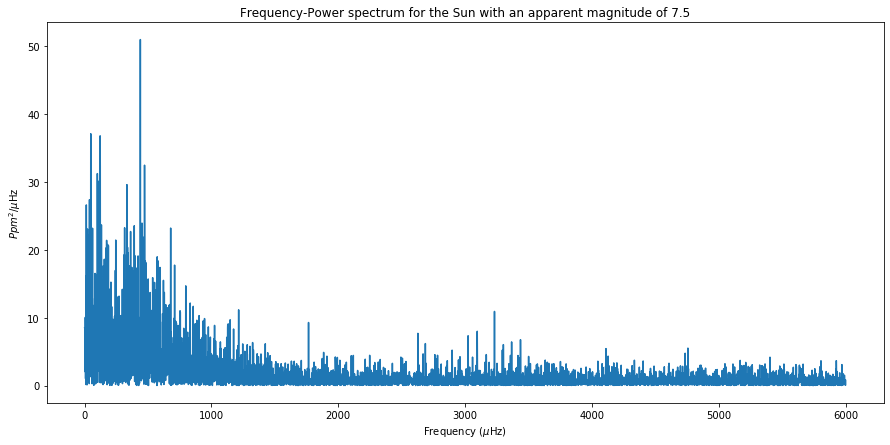

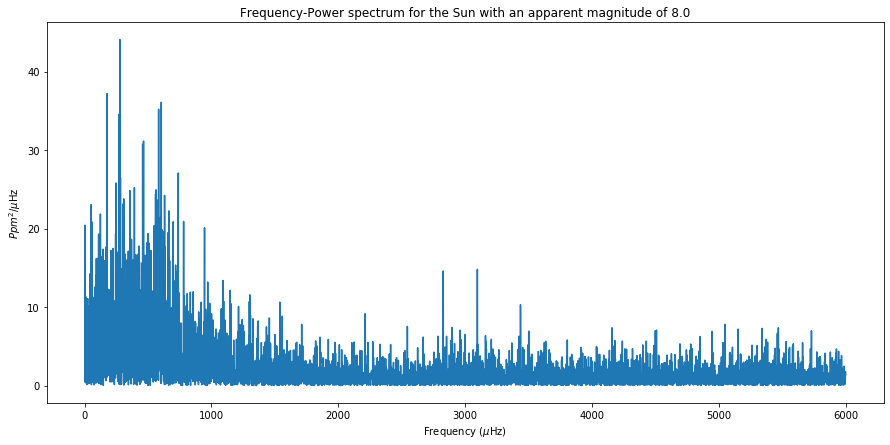

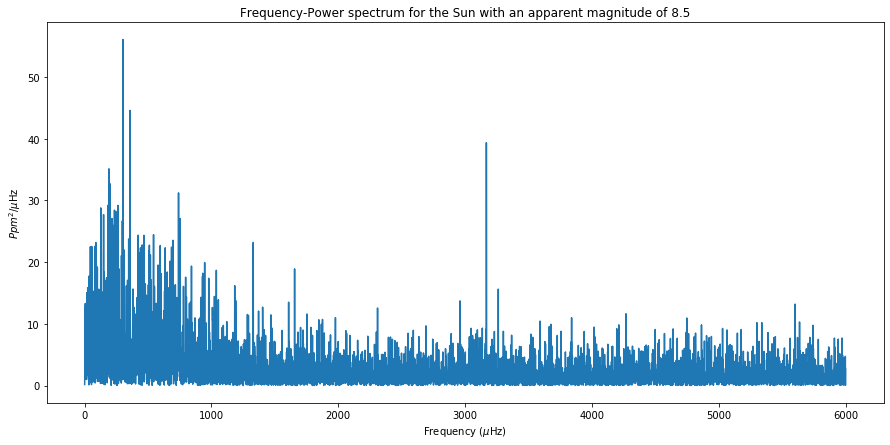

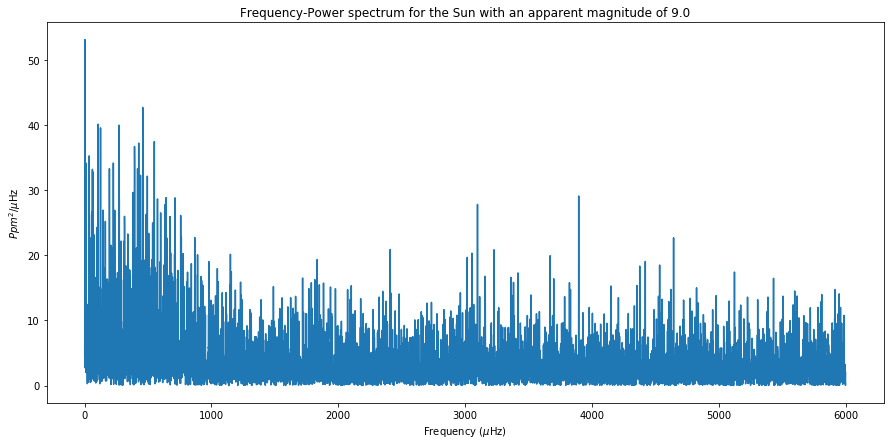

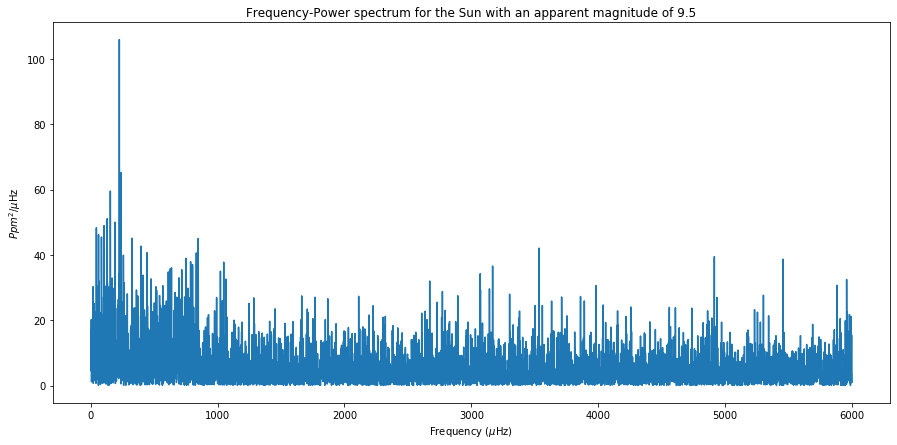

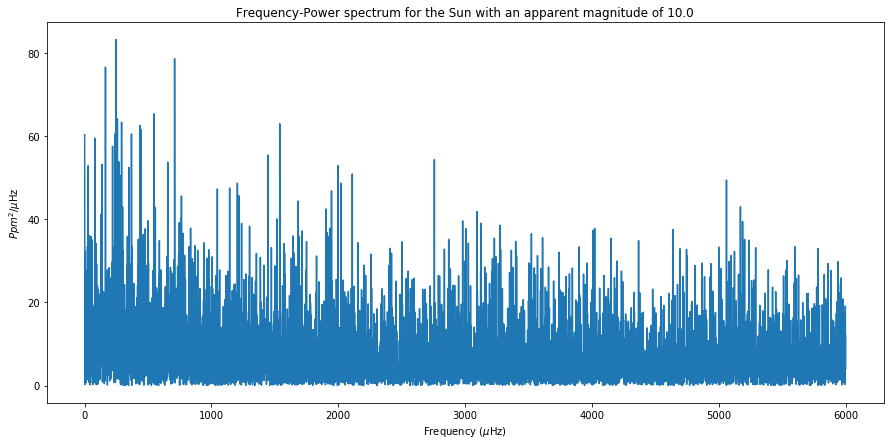

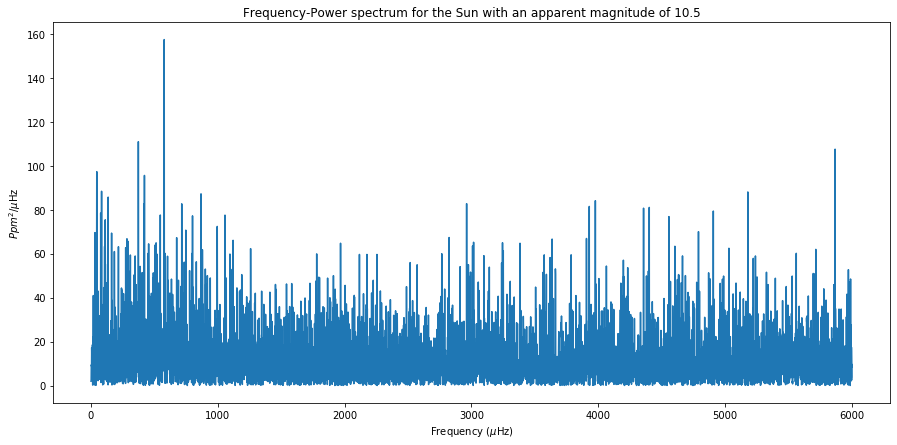

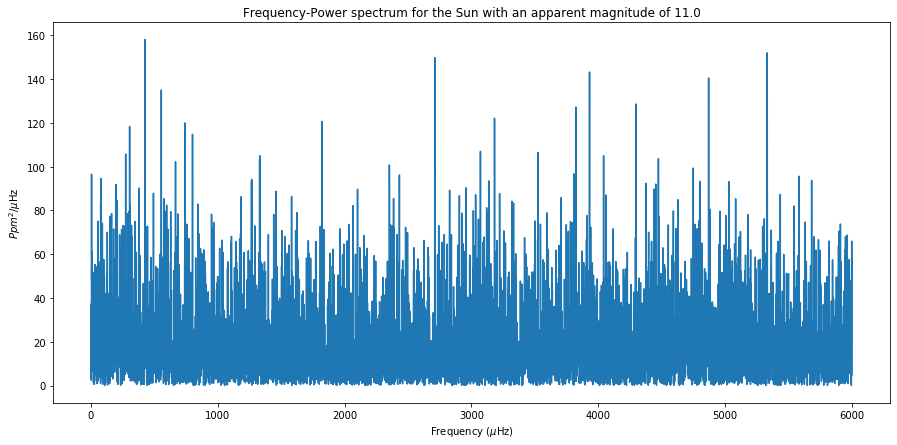

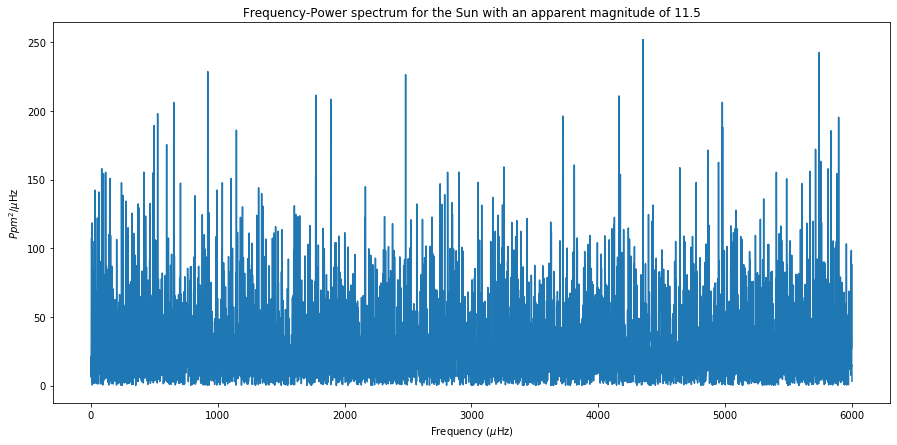

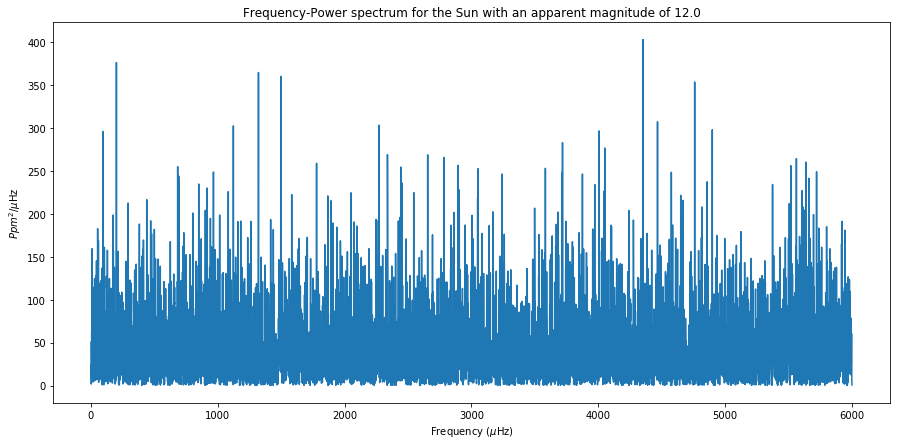

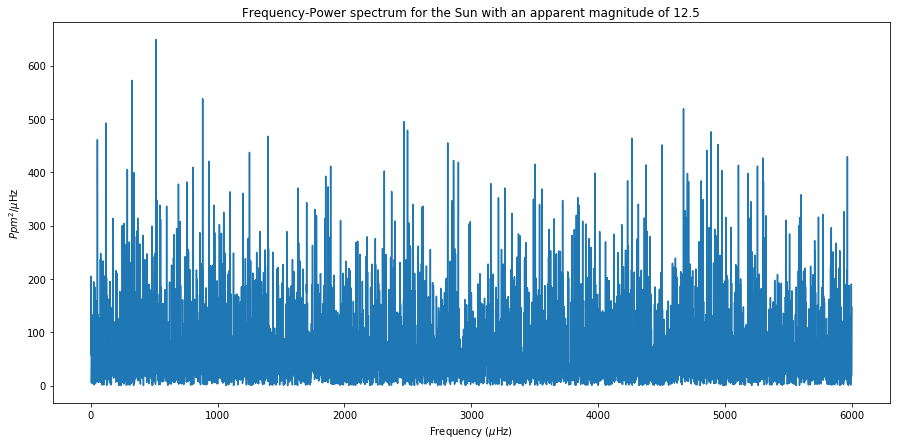

In [28]:
C=0
while C<len(TotalSpec)-1:
    Solar_Comp = addnoise(TotalSpec[C])
    plt.figure(figsize = (15, 7))
    plt.plot(x, Solar_Comp)
    plt.title(f'Frequency-Power spectrum for the Sun with an apparent magnitude of {mags[C]}')
    plt.xlabel('Frequency ($\mu$Hz)')
    plt.ylabel('$Ppm^2$/$\mu$Hz')
    plt.show()
    C+=1

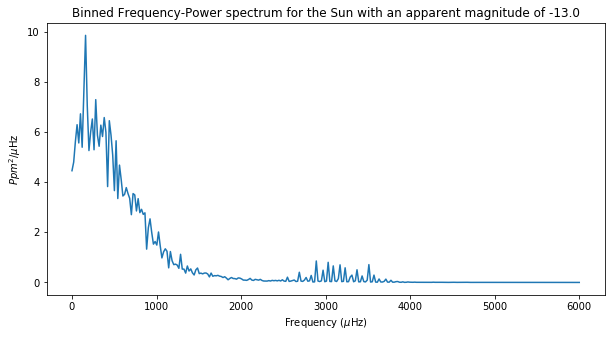

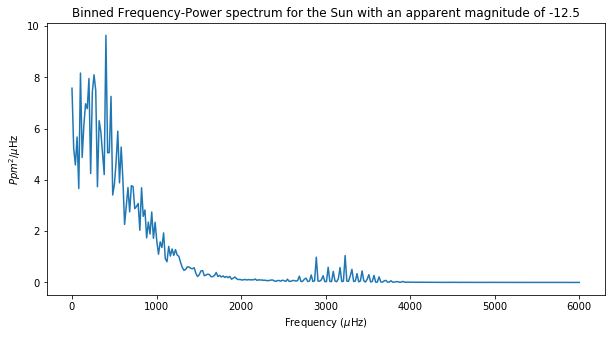

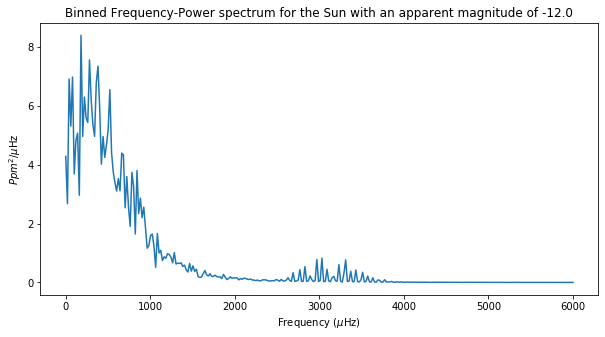

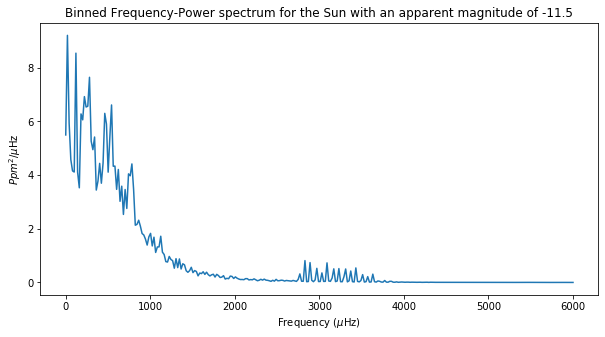

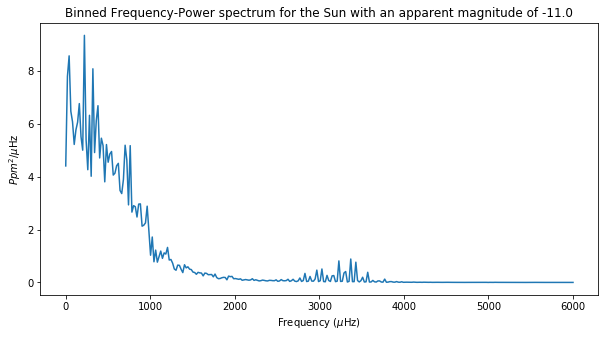

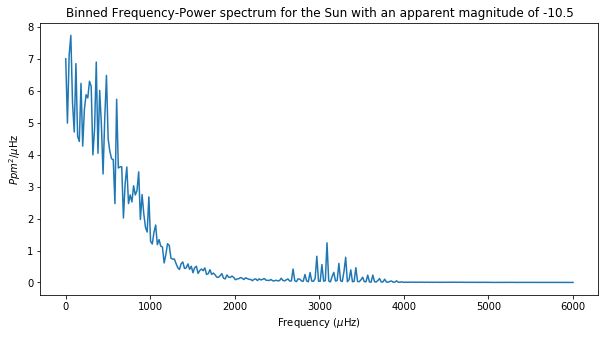

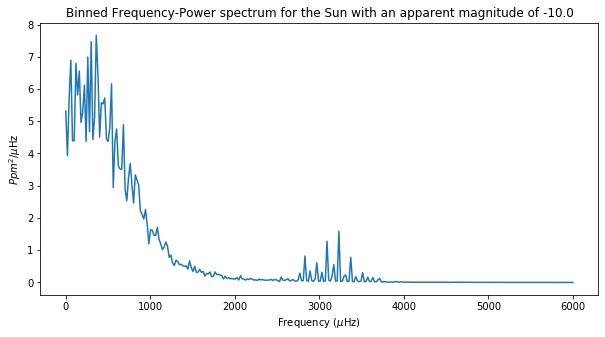

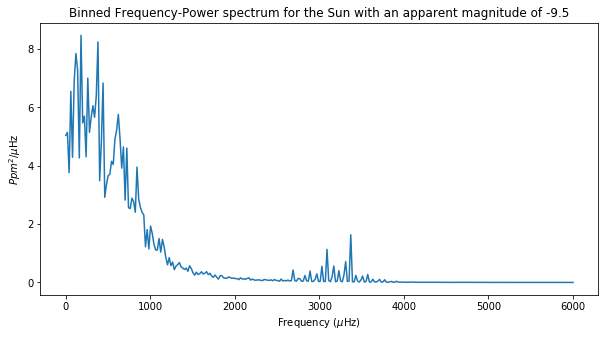

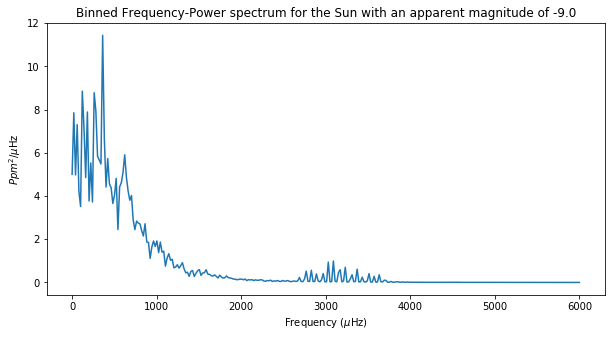

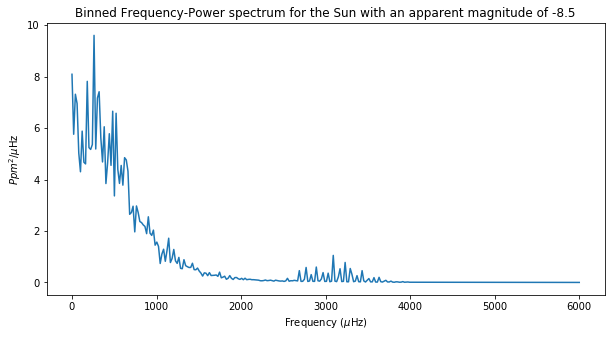

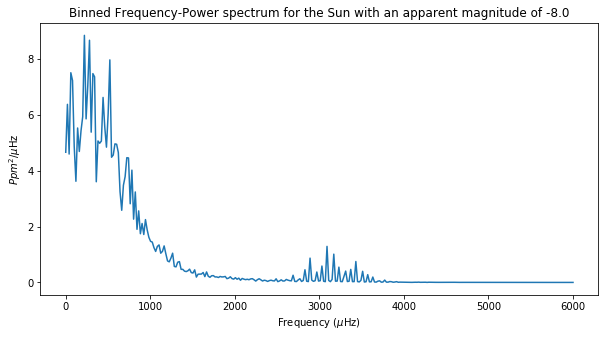

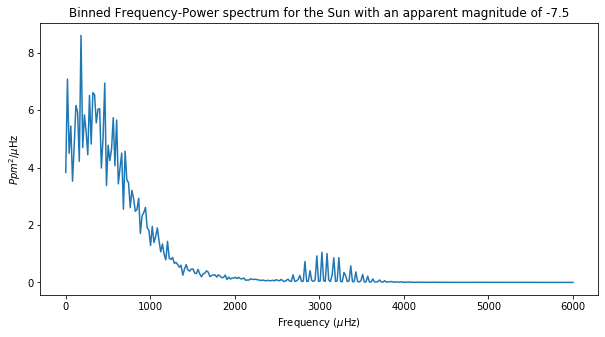

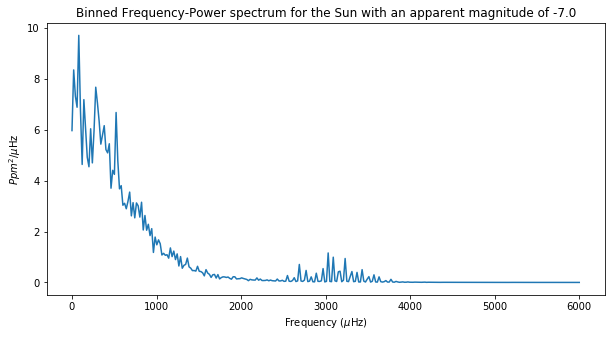

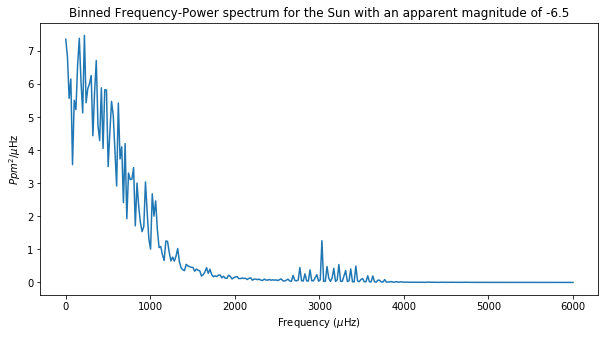

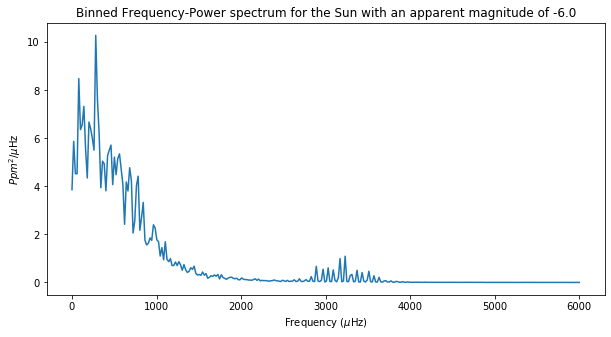

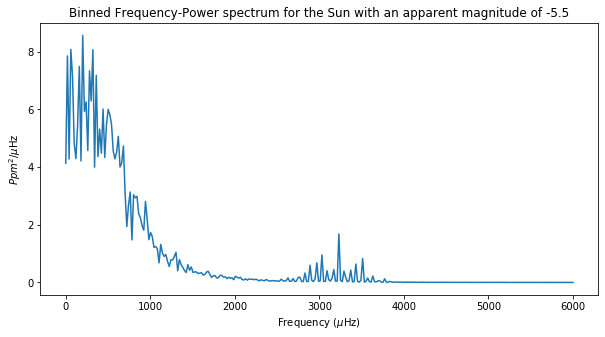

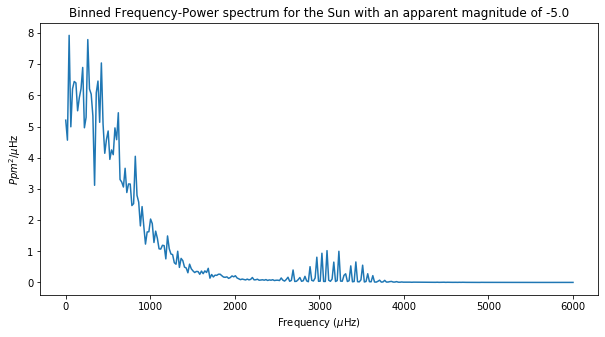

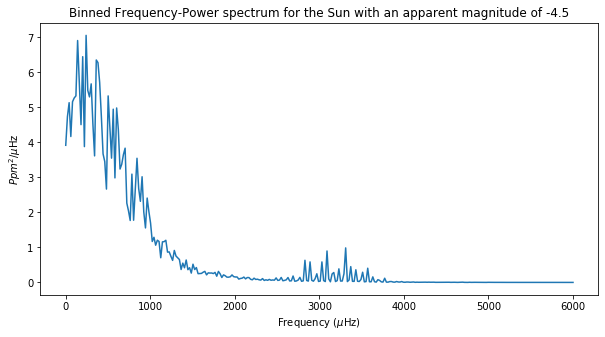

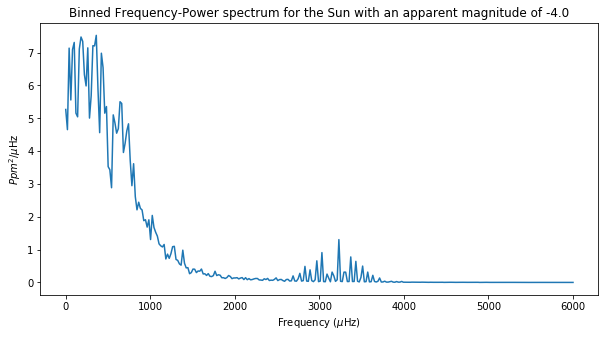

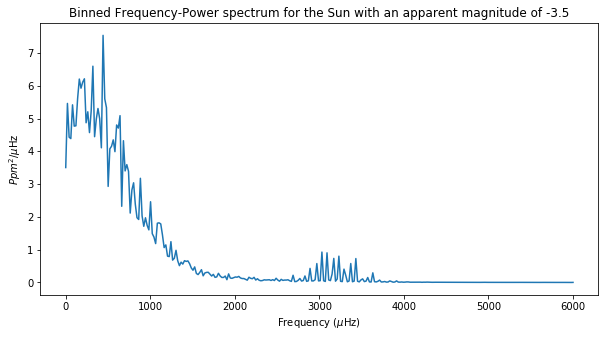

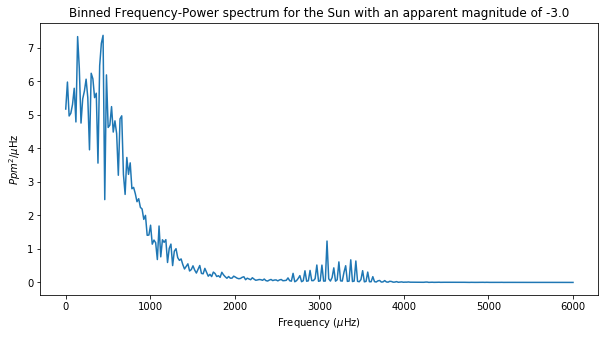

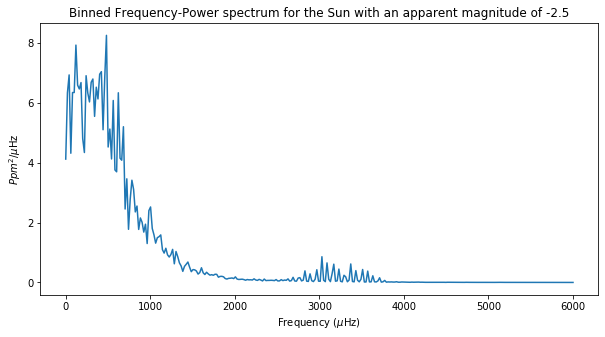

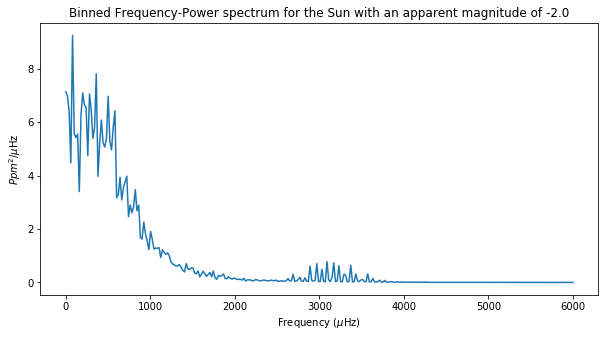

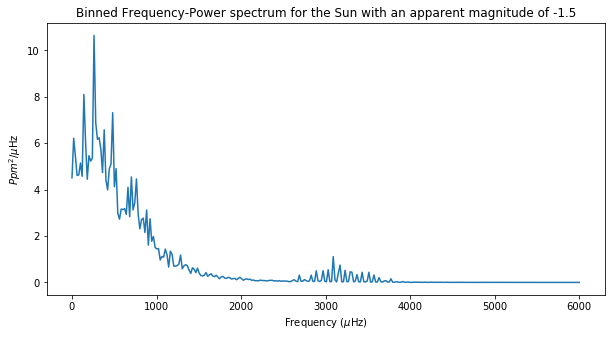

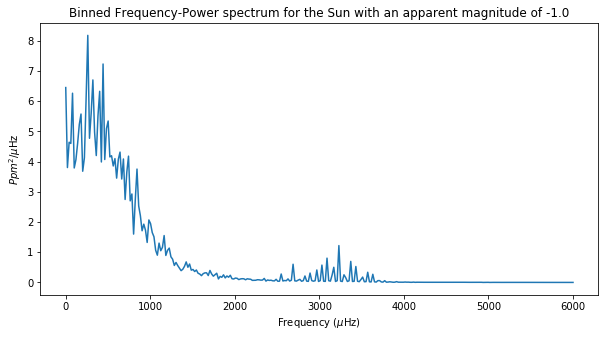

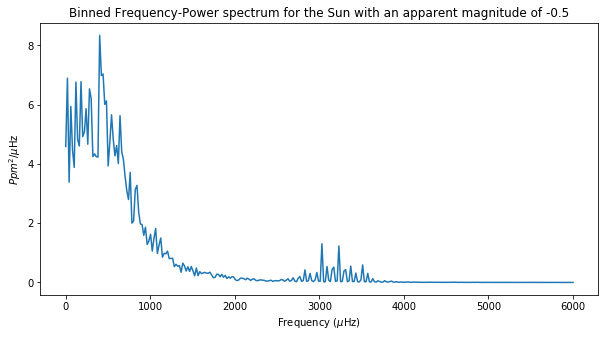

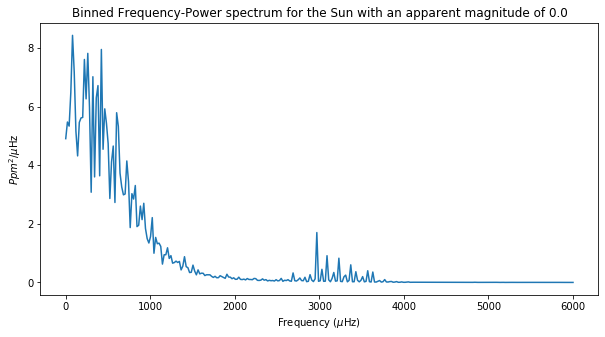

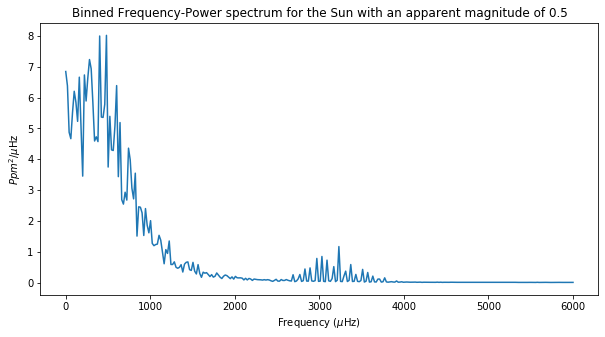

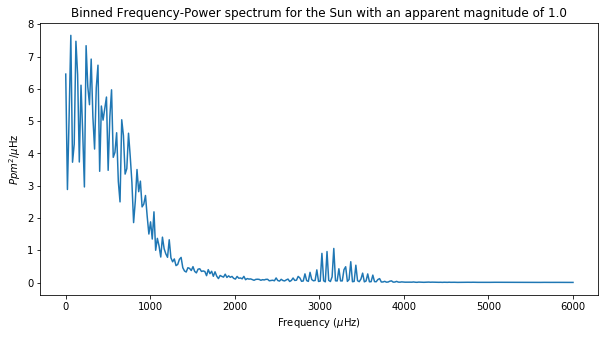

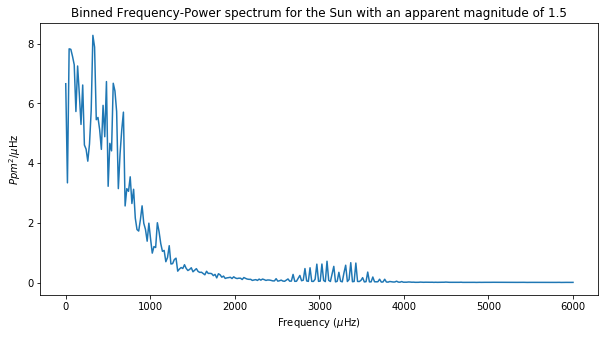

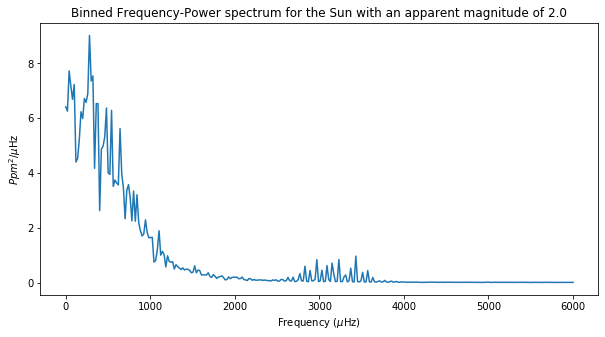

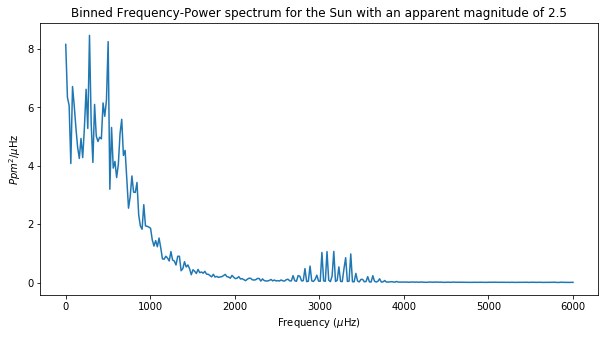

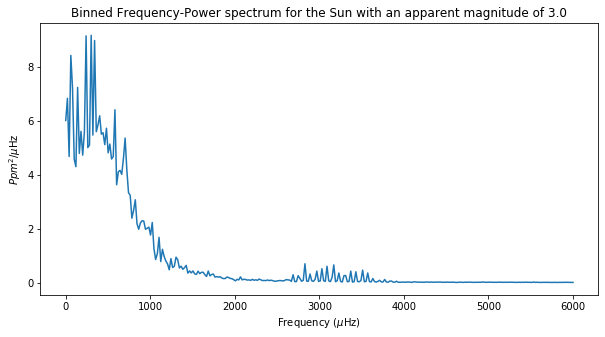

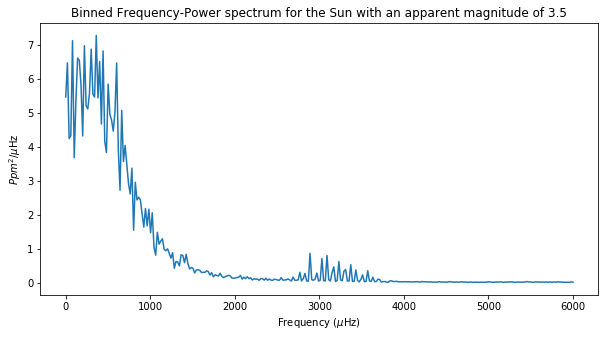

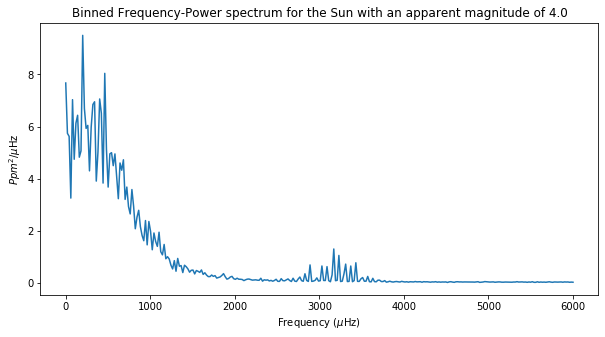

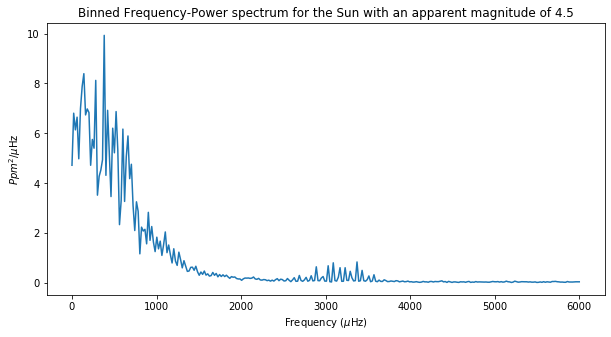

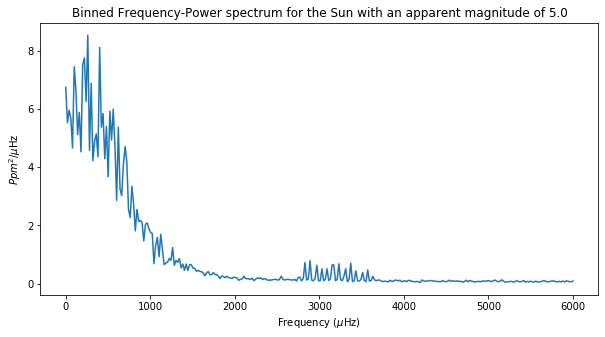

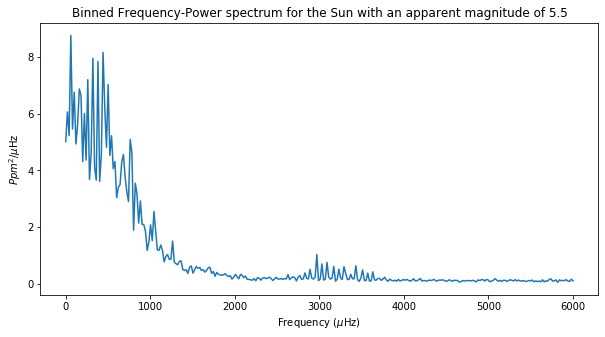

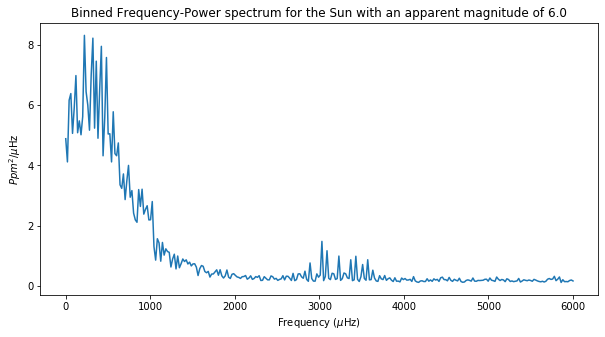

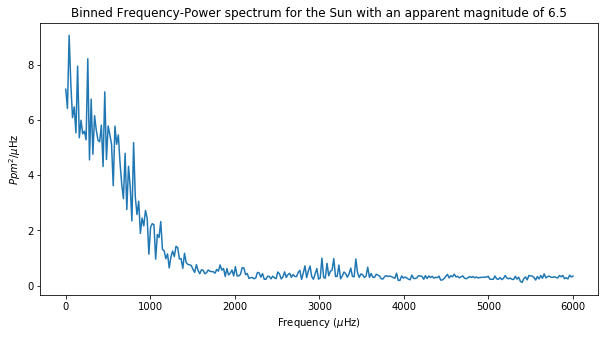

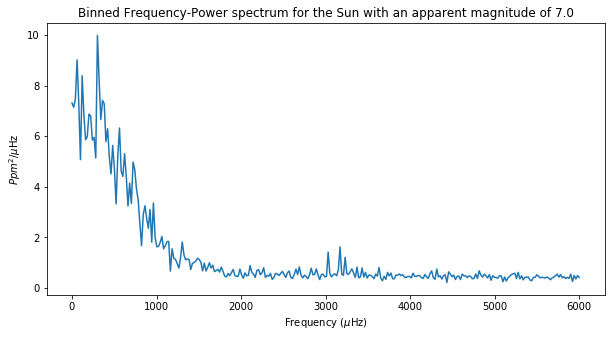

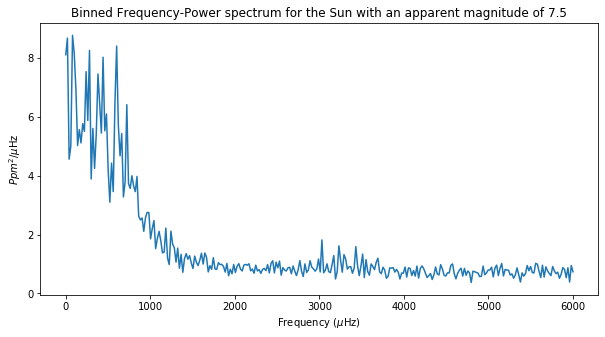

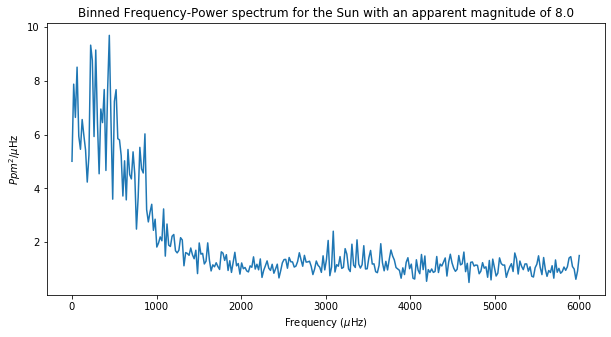

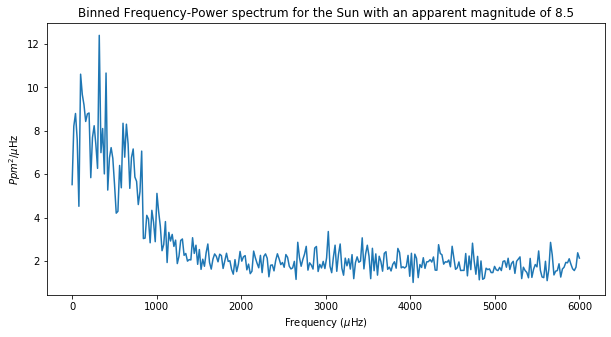

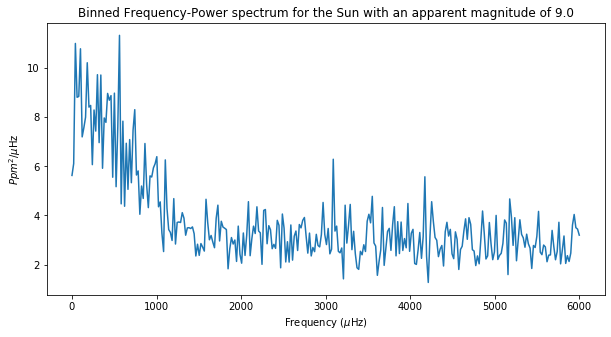

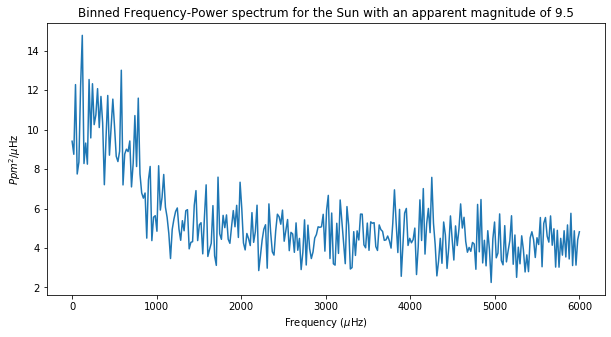

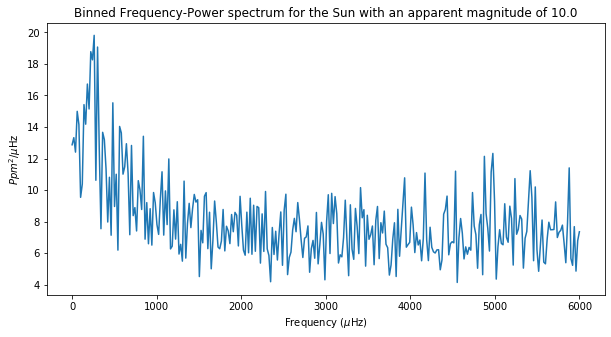

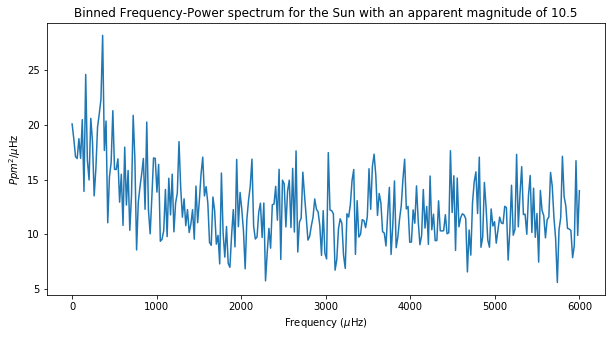

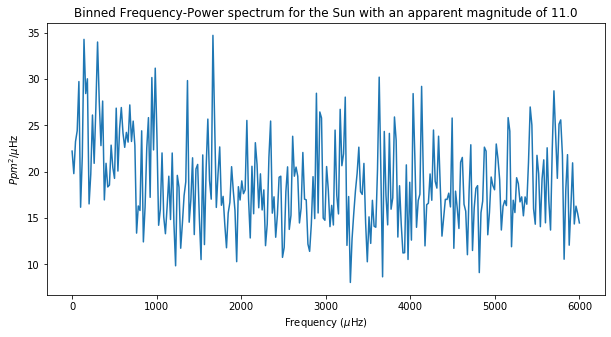

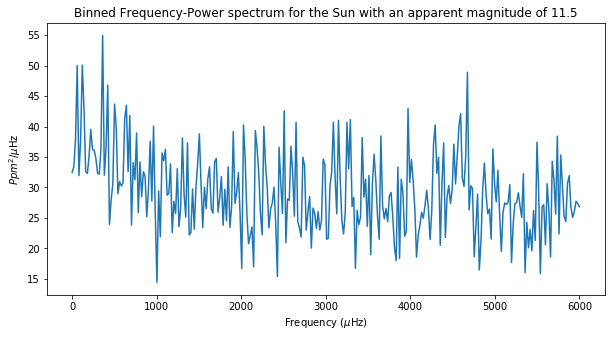

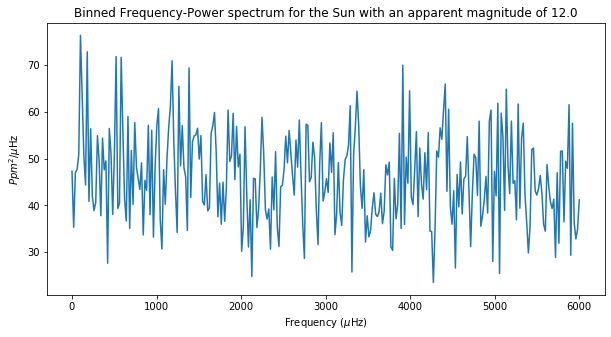

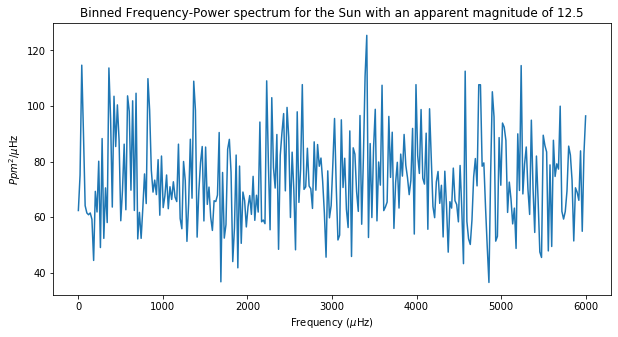

In [33]:
C=0
while C<len(TotalSpec)-1:
    Solar_Comp = addnoise(TotalSpec[C])
    #Solar_Comp_binned = SCb
    SCb = bin_it(Solar_Comp, 20)
    #binned_x-values = bx
    bx = np.linspace(0,len(Solar_Comp),len(SCb))
    plt.figure(figsize = (10, 5))
    plt.plot(bx, SCb)
    plt.title(f'Binned Frequency-Power spectrum for the Sun with an apparent magnitude of {mags[C]}')
    plt.xlabel('Frequency ($\mu$Hz)')
    plt.ylabel('$ppm^2$/$\mu$Hz')
    plt.show()
    C+=1

(300,)
[93.96941583349104, 91.59487707895387, 94.0313275380879, 95.47525697503268, 97.88901415849142, 105.58362894824083, 108.58981916399556, 121.09342581754684, 131.64008621330535, 151.06289326599676, 158.61555822475108, 186.16430978884677, 210.55553665778478, 245.16099178100234, 302.58876062452873, 482.49521096095884, 5797.326780663593, 13284.87116372713, 16409.099417425285, 21530.555286975505, 7605.704952094143]


Text(0.5, 1.0, 'Average Difference in Centroids of Plots with and without Shot Noise')

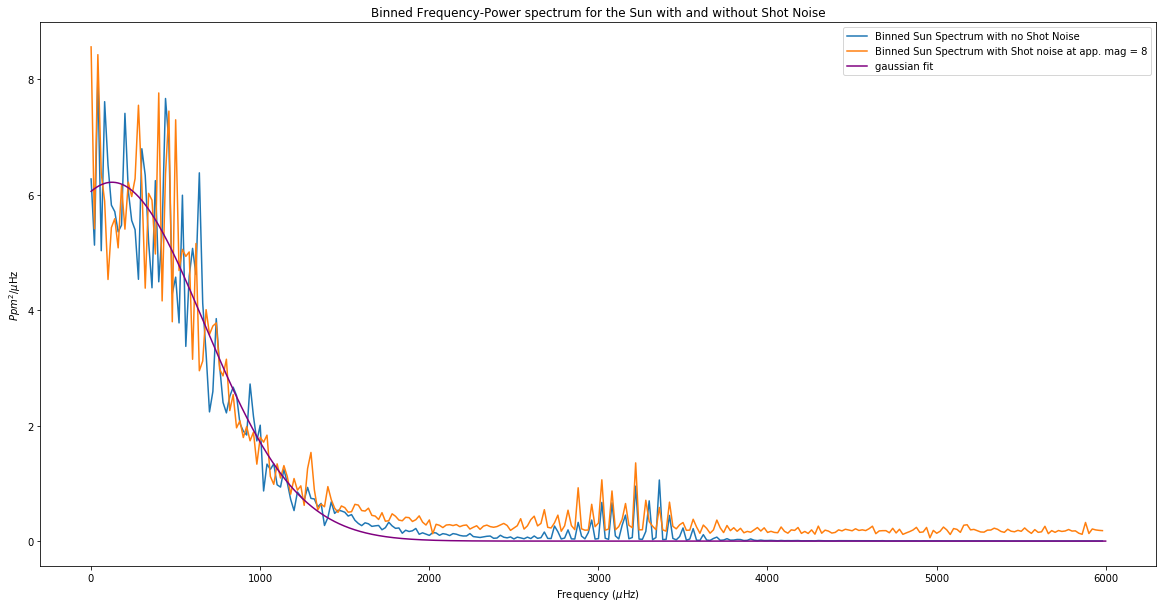

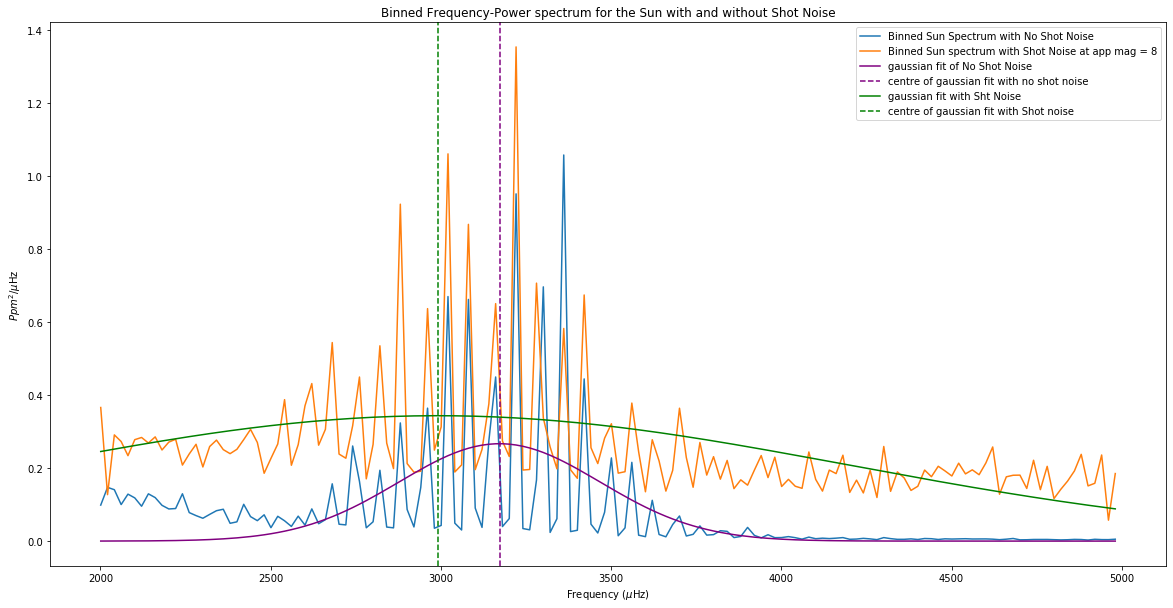

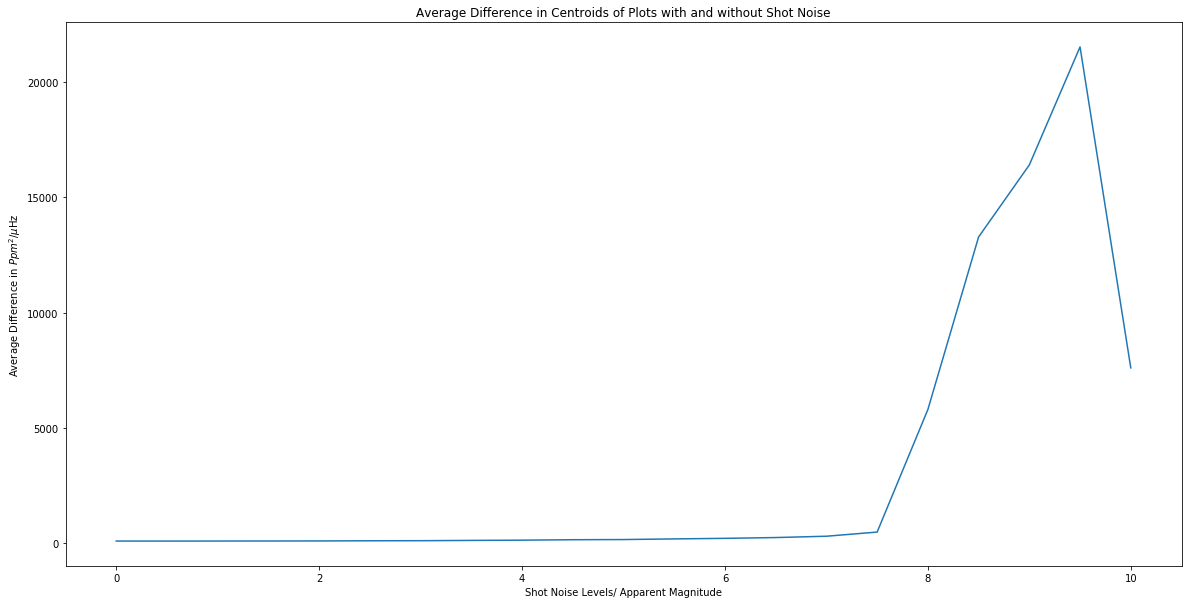

In [37]:
'''CODE BELOW IS CONTRIBUTED BY DAN HART'''
'''this is edited for my variable names'''

'''plots a gaussian'''
def peak(x,height,centre,width):
    return height*np.exp((-(x-centre)**2)/(2*width**2))


vmag = np.full((6000), 6) #here 8 defines the apparent magnitude
shot_noise = 18*10**(-0.4*(11.0-vmag))

ysums_i = Osc + G + shot_noise
ysum = Osc + G
ysumn = addnoise(ysum)
ysumns = addnoise(ysums_i)


binsize = 20
ybin = bin_it(ysumn, binsize)
ybins = bin_it(ysumns, binsize)
xbin = x[0::binsize]
print(np.shape(xbin))

#gaussian fit on binned data
init_guess = [35, 0, 1000]
best_valsfull, covar = curve_fit(peak, x[0::binsize], bin_it(ysumn,binsize), p0=init_guess)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(xbin, ybin, label='Binned Sun Spectrum with no Shot Noise' )
ax.plot(xbin, ybins, label='Binned Sun Spectrum with Shot noise at app. mag = 8' )
ax.plot(x,peak(x,best_valsfull[0],best_valsfull[1],best_valsfull[2]),label='gaussian fit',color='purple')
plt.xlabel('Frequency ($\mu$Hz)')
plt.ylabel('$Ppm^2$/$\mu$Hz')
plt.title('Binned Frequency-Power spectrum for the Sun with and without Shot Noise')
plt.legend()
#Zoom in and attempt gaussian fit

xbinlim = xbin[100:250]
ybinlim = ybin[100:250]
ybinlims = ybins[100:250]
init_guess = [2, 3000, 1000]
best_valscut, covar = curve_fit(peak, xbinlim, ybinlim, p0=init_guess)
best_valscutshot, covar = curve_fit(peak, xbinlim, ybinlims, p0=init_guess)



fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(xbinlim, ybinlim, label='Binned Sun Spectrum with No Shot Noise')
ax.plot(xbinlim, ybinlims, label='Binned Sun spectrum with Shot Noise at app mag = 8')
ax.plot(xbinlim,peak(xbinlim,best_valscut[0],best_valscut[1],best_valscut[2]),label='gaussian fit of No Shot Noise',color='purple')
ax.axvline(x=best_valscut[1], color='purple', linestyle='--', label='centre of gaussian fit with no shot noise')
ax.plot(xbinlim,peak(xbinlim,best_valscutshot[0],best_valscutshot[1],best_valscutshot[2]),label='gaussian fit with Sht Noise',color='green')
ax.axvline(x=best_valscutshot[1], color='green', linestyle='--', label='centre of gaussian fit with Shot noise')
plt.xlabel('Frequency ($\mu$Hz)')
plt.ylabel('$Ppm^2$/$\mu$Hz')
plt.title('Binned Frequency-Power spectrum for the Sun with and without Shot Noise')
plt.legend()

#SHOT NOISE LEVEL TEST
shotnoises = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
differencesavg = []
for n in shotnoises:
    differences = []
    for z in np.arange(500):
        try:
            vmag = np.full((6000), n) #here 8 defines the apparent magnitude
            shot_noise = 18*10**(-0.4*(11.0-vmag))
            ysums = Osc+G+shot_noise
            ysumns = addnoise(ysums)
            
            ybin = bin_it(ysumn, binsize)
            ybins = bin_it(ysumns, binsize)
            ybinlim = ybin[100:250]
            ybinlims = ybins[100:250]
            init_guess = [2, 3000, 1000]
            best_valscut, covar = curve_fit(peak, xbinlim, ybinlim, p0=init_guess)
            best_valscutshot, covar = curve_fit(peak, xbinlim, ybinlims, p0=init_guess)
            differences.append(best_valscut[1] - best_valscutshot[1])
        except:
            pass
    differencesavg.append(np.mean(differences))
    
print(differencesavg)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(shotnoises,differencesavg)
plt.xlabel('Shot Noise Levels/ Apparent Magnitude')
plt.ylabel('Average Difference in $Ppm^2$/$\mu$Hz')
plt.title('Average Difference in Centroids of Plots with and without Shot Noise')